In [2]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
sns.set()
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from statsmodels.tsa.stattools import adfuller
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dropout
from xgboost import XGBRegressor

In [3]:
Dfpl=pd.read_csv("/Users/aa085/Music/Zula.csv") #Web-scraping codes shared in different file 
Dfpl

Unnamed: 0                                               Name  \
0             0                                        Jack Clarke   
1             1                                      Luka Ivanusec   
2             2                                  Michael Gregor...   
3             3                                       Isaiah Jones   
4             4                                         Mathys Tel   
..          ...                                                ...   
737         737                                           Raphinha   
738         738                                  Gabriel Strefezza   
739         739                                      Omar Marmoush   
740         740                                  Firas Al-Buraikan   
741         741                                       Ricardo Pepi   

       Sub-Position        Country  Matches  Goals  \
0       Left Winger        England      166     29   
1       Left Winger        Croatia      272     48   
2    Centre-Forward        Austria      420     94   
3      Right Winger        England      137     12   
4    Centre-Forward         France       63     21   
..              ...            ...      ...    ...   
737    Right Winger         Brazil      306     74   
738    Right Winger         Brazil      238     43   
739  Centre-Forward          Egypt      165     43   
740  Centre-Forward   Saudi Arabia      115     40   
741  Centre-Forward  United States      136     44   

                                                 Links  Injury_Sum  \
0    https://www.transfermarkt.us/jack-clarke/profi...           0   
1    https://www.transfermarkt.us/luka-ivanusec/pro...          19   
2    https://www.transfermarkt.us/michael-gregorits...          39   
3    https://www.transfermarkt.us/isaiah-jones/prof...           8   
4    https://www.transfermarkt.us/mathys-tel/profil...           4   
..                                                 ...         ...   
737  https://www.transfermarkt.us/raphinha/profil/s...          27   
738  https://www.transfermarkt.us/gabriel-strefezza...           6   
739  https://www.transfermarkt.us/omar-marmoush/pro...           9   
740  https://www.transfermarkt.us/firas-al-buraikan...           0   
741  https://www.transfermarkt.us/ricardo-pepi/prof...           1   

                                          Achievements  Shirt Number  ...  \
0                         1x English 2nd tier champion            20  ...   
1         4x Croatian champion, 1x Croatian cup winner            17  ...   
2                        1x Steiermark league champion            38  ...   
3                                                  NaN            11  ...   
4    1x German Champion, 1x European Under-17 champion            39  ...   
..                                                 ...           ...  ...   
737  1x Spanish champion, 1x Spanish Super Cup winn...            11  ...   
738                  2x Italienischer Zweitligameister            27  ...   
739              1x German Regionalliga North Champion             7  ...   
740  1x Saudi Arabian champion, 1x Saudi Super Cup ...            20  ...   
741  1x Dutch Super Cup winner, 1x CONCACAF Nations...            14  ...   

     Assist Per Season  RecentProgress  \
0             4.833333          220.00   
1             4.250000             NaN   
2             2.230769          145.00   
3             2.875000           82.80   
4             1.000000          900.00   
..                 ...             ...   
737           5.300000          780.00   
738           2.600000          176.80   
739           1.625000          144.00   
740           2.142857           83.95   
741           2.250000          160.00   

                                                League            Team  \
0     Championship                                         Sunderland    
1       Eredivisie                                          Feyenoord    
2       Bundesliga    

In [9]:
Dfpl.columns

Index(['Name', 'Sub-Position', 'Country', 'Matches', 'Goals', 'Links',
       'Injury_Sum', 'Achievements', 'Shirt Number', 'ages', 'Heights',
       'Difference Percentage', 'Progress', 'Assist', 'Yellow Cards Count',
       'Red Cards Count', 'minutos', 'Currentvalue(M)', 'PrefFoot',
       'ContributionPerMin', 'Individual Award', 'Goal Per Season',
       'Assist Per Season', 'RecentProgress', 'League', 'Team', 'Goals2022',
       'Goals2020', 'Goals2021', 'League_Code', 'Cups', 'position'],
      dtype='object')

In [306]:
Tmf=pd.read_csv("/Users/aa085/Music/AllD.csv") #Result from web-scraping
Tmf

Unnamed: 0  Season Matches Goals Assists Minutes
0               0    2010     NaN    91      22     NaN
1               1    2011     NaN    91      22     NaN
2               2    2012     NaN    91      22     NaN
3               3    2013     NaN    91      22     NaN
4               4    2014     NaN    91      22     NaN
...           ...     ...     ...   ...     ...     ...
10383         583    2019      20     3       1    563'
10384         584    2020      31    13       2  2.099'
10385         585    2021      11     -       -    475'
10386         586    2022      36    13       3  2.744'
10387         587    2023      21     6       1    342'

[10388 rows x 6 columns]

In [365]:
Tmf.isna().sum()

Season        0
Matches    4243
Goals      4243
Assists    4243
Minutes    3951
dtype: int64

In [318]:
Tmf.loc[Tmf["Minutes"].isna(), ["Matches", "Goals", "Assists", "Minutes"]] = np.nan
Tmf

Season Matches Goals Assists Minutes
0        2010     NaN   NaN     NaN     NaN
1        2011     NaN   NaN     NaN     NaN
2        2012     NaN   NaN     NaN     NaN
3        2013     NaN   NaN     NaN     NaN
4        2014     NaN   NaN     NaN     NaN
...       ...     ...   ...     ...     ...
10383    2019      20     3       1    563'
10384    2020      31    13       2  2.099'
10385    2021      11     -       -    475'
10386    2022      36    13       3  2.744'
10387    2023      21     6       1    342'

[10388 rows x 5 columns]

### Data cleaning

In [339]:
Tmf.loc[Tmf["Goals"].astype(str).str.contains("/", na=False), "Goals"] = np.nan

In [349]:
Tmf.loc[Tmf["Assists"].astype(str).str.contains("A", na=False), "Assists"] = np.nan

In [363]:
Tmf.loc[Tmf["Matches"].astype(str).str.contains("\n", na=False), "Matches"] = np.nan

In [371]:
Tmf["Minutes"] = Tmf["Minutes"].str.replace("'", "")

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_5448/839793664.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Tmf["Minutes"] = Tmf["Minutes"].str.replace(".", "")


In [372]:
Tmf["Minutes"].value_counts().head(30)

-       60
80      49
90      46
40      24
45      21
180     17
44      15
70      12
12      11
13      10
20      10
31       9
7        8
25       8
16       8
1126     7
22       7
2744     7
28       7
1413     7
26       7
58       7
934      7
18       7
1293     7
29       7
2502     7
60       7
2170     7
2608     7
Name: Minutes, dtype: int64

In [300]:
Year=Tmf["Season"].value_counts()
Year=pd.DataFrame(Year)
Year

Season
2010     742
2011     742
2012     742
2013     742
2014     742
2015     742
2016     742
2017     742
2018     742
2019     742
2020     742
2021     742
2022     742
2023     742

In [396]:
Year=Year.reset_index()
Year

index  Season
0    2010     742
1    2011     742
2    2012     742
3    2013     742
4    2014     742
5    2015     742
6    2016     742
7    2017     742
8    2018     742
9    2019     742
10   2020     742
11   2021     742
12   2022     742
13   2023     742

### Concatenating results of web-scraping

In [376]:
Dfpl

Name    Sub-Position  \
0                                          Jack Clarke     Left Winger   
1                                        Luka Ivanusec     Left Winger   
2                                    Michael Gregor...  Centre-Forward   
3                                         Isaiah Jones    Right Winger   
4                                           Mathys Tel  Centre-Forward   
..                                                 ...             ...   
737                                           Raphinha    Right Winger   
738                                  Gabriel Strefezza    Right Winger   
739                                      Omar Marmoush  Centre-Forward   
740                                  Firas Al-Buraikan  Centre-Forward   
741                                       Ricardo Pepi  Centre-Forward   

           Country  Matches  Goals  \
0          England      166     29   
1          Croatia      272     48   
2          Austria      420     94   
3          England      137     12   
4           France       63     21   
..             ...      ...    ...   
737         Brazil      306     74   
738         Brazil      238     43   
739          Egypt      165     43   
740   Saudi Arabia      115     40   
741  United States      136     44   

                                                 Links  Injury_Sum  \
0    https://www.transfermarkt.us/jack-clarke/profi...           0   
1    https://www.transfermarkt.us/luka-ivanusec/pro...          19   
2    https://www.transfermarkt.us/michael-gregorits...          39   
3    https://www.transfermarkt.us/isaiah-jones/prof...           8   
4    https://www.transfermarkt.us/mathys-tel/profil...           4   
..                                                 ...         ...   
737  https://www.transfermarkt.us/raphinha/profil/s...          27   
738  https://www.transfermarkt.us/gabriel-strefezza...           6   
739  https://www.transfermarkt.us/omar-marmoush/pro...           9   
740  https://www.transfermarkt.us/firas-al-buraikan...           0   
741  https://www.transfermarkt.us/ricardo-pepi/prof...           1   

                                          Achievements  Shirt Number  ages  \
0                         1x English 2nd tier champion            20    22   
1         4x Croatian champion, 1x Croatian cup winner            17    24   
2                        1x Steiermark league champion            38    29   
3                                                  NaN            11    24   
4    1x German Champion, 1x European Under-17 champion            39    18   
..                                                 ...           ...   ...   
737  1x Spanish champion, 1x Spanish Super Cup winn...            11    26   
738                  2x Italienischer Zweitligameister            27    26   
739              1x German Regionalliga North Champion             7    24   
740  1x Saudi Arabian champion, 1x Saudi Super Cup ...            20    23   
741  1x Dutch Super Cup winner, 1x CONCACAF Nations...            14    20   

     ...  Assist Per Season  RecentProgress  \
0    ...           4.833333          220.00   
1    ...           4.250000             NaN   
2    ...           2.230769          145.00   
3    ...           2.875000           82.80   
4    ...           1.000000          900.00   
..   ...                ...             ...   
737  ...           5.300000          780.00   
738  ...           2.600000          176.80   
739  ...           1.625000          144.00   
740  ...           2.142857           83.95   
741  ...           2.250000          160.00   

                                                League            Team  \
0     Championship                                         Sunderland    
1       Eredivisie                                          Feyenoord    
2       Bundesliga                                        SC Freiburg    
3     Championship                                      Middlesbr

In [398]:
dataframes = {}

for a in Year['index']:
    df_key = "Y" + str(a)
    dataframes[df_key] = Tmf[Tmf["Season"] == a].copy()
    dataframes[df_key].columns = [str(a), str(a) + "M", str(a) + "G", str(a) + "A", str(a) + "Min"]
dataframes

{'Y2010':        2010 2010M 2010G 2010A 2010Min
 0      2010   NaN   NaN   NaN     NaN
 14     2010   NaN   NaN   NaN     NaN
 28     2010    42     7     3    1908
 42     2010   NaN   NaN   NaN     NaN
 56     2010   NaN   NaN   NaN     NaN
 ...     ...   ...   ...   ...     ...
 10318  2010   NaN   NaN   NaN     NaN
 10332  2010   NaN   NaN   NaN     NaN
 10346  2010   NaN   NaN   NaN     NaN
 10360  2010   NaN   NaN   NaN     NaN
 10374  2010   NaN   NaN   NaN     NaN
 
 [742 rows x 5 columns],
 'Y2011':        2011 2011M 2011G 2011A 2011Min
 1      2011   NaN   NaN   NaN     NaN
 15     2011   NaN   NaN   NaN     NaN
 29     2011    23     2     -    1264
 43     2011   NaN   NaN   NaN     NaN
 57     2011   NaN   NaN   NaN     NaN
 ...     ...   ...   ...   ...     ...
 10319  2011   NaN   NaN   NaN     NaN
 10333  2011   NaN   NaN   NaN     NaN
 10347  2011   NaN   NaN   NaN     NaN
 10361  2011   NaN   NaN   NaN     NaN
 10375  2011   NaN   NaN   NaN     NaN
 
 [742 rows x 5 co

In [405]:
for key in dataframes.keys():
    if key[1:5] in dataframes[key].columns:
        dataframes[key] = dataframes[key].drop(key[1:5], axis=1)
dataframes

{'Y2010':       2010M 2010G 2010A 2010Min
 0       NaN   NaN   NaN     NaN
 14      NaN   NaN   NaN     NaN
 28       42     7     3    1908
 42      NaN   NaN   NaN     NaN
 56      NaN   NaN   NaN     NaN
 ...     ...   ...   ...     ...
 10318   NaN   NaN   NaN     NaN
 10332   NaN   NaN   NaN     NaN
 10346   NaN   NaN   NaN     NaN
 10360   NaN   NaN   NaN     NaN
 10374   NaN   NaN   NaN     NaN
 
 [742 rows x 4 columns],
 'Y2011':       2011M 2011G 2011A 2011Min
 1       NaN   NaN   NaN     NaN
 15      NaN   NaN   NaN     NaN
 29       23     2     -    1264
 43      NaN   NaN   NaN     NaN
 57      NaN   NaN   NaN     NaN
 ...     ...   ...   ...     ...
 10319   NaN   NaN   NaN     NaN
 10333   NaN   NaN   NaN     NaN
 10347   NaN   NaN   NaN     NaN
 10361   NaN   NaN   NaN     NaN
 10375   NaN   NaN   NaN     NaN
 
 [742 rows x 4 columns],
 'Y2012':       2012M 2012G 2012A 2012Min
 2       NaN   NaN   NaN     NaN
 16      NaN   NaN   NaN     NaN
 30       28    11     -    

In [406]:
for key in dataframes.keys():
    dataframes[key]=dataframes[key].reset_index()
    dataframes[key]=dataframes[key].drop("index",axis=1)
dataframes

{'Y2010':     2010M 2010G 2010A 2010Min
 0     NaN   NaN   NaN     NaN
 1     NaN   NaN   NaN     NaN
 2      42     7     3    1908
 3     NaN   NaN   NaN     NaN
 4     NaN   NaN   NaN     NaN
 ..    ...   ...   ...     ...
 737   NaN   NaN   NaN     NaN
 738   NaN   NaN   NaN     NaN
 739   NaN   NaN   NaN     NaN
 740   NaN   NaN   NaN     NaN
 741   NaN   NaN   NaN     NaN
 
 [742 rows x 4 columns],
 'Y2011':     2011M 2011G 2011A 2011Min
 0     NaN   NaN   NaN     NaN
 1     NaN   NaN   NaN     NaN
 2      23     2     -    1264
 3     NaN   NaN   NaN     NaN
 4     NaN   NaN   NaN     NaN
 ..    ...   ...   ...     ...
 737   NaN   NaN   NaN     NaN
 738   NaN   NaN   NaN     NaN
 739   NaN   NaN   NaN     NaN
 740   NaN   NaN   NaN     NaN
 741   NaN   NaN   NaN     NaN
 
 [742 rows x 4 columns],
 'Y2012':     2012M 2012G 2012A 2012Min
 0     NaN   NaN   NaN     NaN
 1     NaN   NaN   NaN     NaN
 2      28    11     -    2078
 3     NaN   NaN   NaN     NaN
 4     NaN   NaN   N

In [407]:
for key in dataframes.keys():
    dataframes[key]=dataframes[key].iloc[:,:].replace("-","0")

In [408]:
for key in dataframes.keys():
    for col in dataframes[key].columns:
        dataframes[key][col] = dataframes[key][col].astype(float)
dataframes

{'Y2010':      2010M  2010G  2010A  2010Min
 0      NaN    NaN    NaN      NaN
 1      NaN    NaN    NaN      NaN
 2     42.0    7.0    3.0   1908.0
 3      NaN    NaN    NaN      NaN
 4      NaN    NaN    NaN      NaN
 ..     ...    ...    ...      ...
 737    NaN    NaN    NaN      NaN
 738    NaN    NaN    NaN      NaN
 739    NaN    NaN    NaN      NaN
 740    NaN    NaN    NaN      NaN
 741    NaN    NaN    NaN      NaN
 
 [742 rows x 4 columns],
 'Y2011':      2011M  2011G  2011A  2011Min
 0      NaN    NaN    NaN      NaN
 1      NaN    NaN    NaN      NaN
 2     23.0    2.0    0.0   1264.0
 3      NaN    NaN    NaN      NaN
 4      NaN    NaN    NaN      NaN
 ..     ...    ...    ...      ...
 737    NaN    NaN    NaN      NaN
 738    NaN    NaN    NaN      NaN
 739    NaN    NaN    NaN      NaN
 740    NaN    NaN    NaN      NaN
 741    NaN    NaN    NaN      NaN
 
 [742 rows x 4 columns],
 'Y2012':      2012M  2012G  2012A  2012Min
 0      NaN    NaN    NaN      NaN
 1      N

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_5448/3819474152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframes[key].iloc[:, 1])
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_5448/3819474152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframes[key

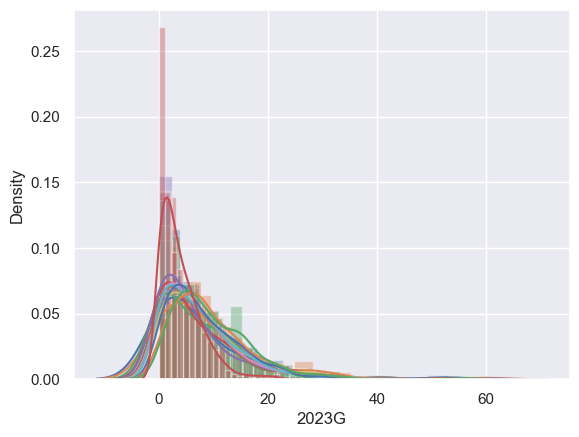

In [409]:
for key in dataframes.keys():
    sns.distplot(dataframes[key].iloc[:, 1])
plt.show()

In [412]:
for key in dataframes.keys():
    for col in dataframes[key].columns:
         Dfpl[col]=dataframes[key][col]
Dfpl

Name    Sub-Position  \
0                                          Jack Clarke     Left Winger   
1                                        Luka Ivanusec     Left Winger   
2                                    Michael Gregor...  Centre-Forward   
3                                         Isaiah Jones    Right Winger   
4                                           Mathys Tel  Centre-Forward   
..                                                 ...             ...   
737                                           Raphinha    Right Winger   
738                                  Gabriel Strefezza    Right Winger   
739                                      Omar Marmoush  Centre-Forward   
740                                  Firas Al-Buraikan  Centre-Forward   
741                                       Ricardo Pepi  Centre-Forward   

           Country  Matches  Goals  \
0          England  Matches  Goals   
1          Croatia  Matches  Goals   
2          Austria  Matches  Goals   
3          England  Matches  Goals   
4           France  Matches  Goals   
..             ...      ...    ...   
737         Brazil  Matches  Goals   
738         Brazil  Matches  Goals   
739          Egypt  Matches  Goals   
740   Saudi Arabia  Matches  Goals   
741  United States  Matches  Goals   

                                                 Links  Injury_Sum  \
0    https://www.transfermarkt.us/jack-clarke/profi...           0   
1    https://www.transfermarkt.us/luka-ivanusec/pro...          19   
2    https://www.transfermarkt.us/michael-gregorits...          39   
3    https://www.transfermarkt.us/isaiah-jones/prof...           8   
4    https://www.transfermarkt.us/mathys-tel/profil...           4   
..                                                 ...         ...   
737  https://www.transfermarkt.us/raphinha/profil/s...          27   
738  https://www.transfermarkt.us/gabriel-strefezza...           6   
739  https://www.transfermarkt.us/omar-marmoush/pro...           9   
740  https://www.transfermarkt.us/firas-al-buraikan...           0   
741  https://www.transfermarkt.us/ricardo-pepi/prof...           1   

                                          Achievements  Shirt Number  ages  \
0                         1x English 2nd tier champion            20    22   
1         4x Croatian champion, 1x Croatian cup winner            17    24   
2                        1x Steiermark league champion            38    29   
3                                                  NaN            11    24   
4    1x German Champion, 1x European Under-17 champion            39    18   
..                                                 ...           ...   ...   
737  1x Spanish champion, 1x Spanish Super Cup winn...            11    26   
738                  2x Italienischer Zweitligameister            27    26   
739              1x German Regionalliga North Champion             7    24   
740  1x Saudi Arabian champion, 1x Saudi Super Cup ...            20    23   
741  1x Dutch Super Cup winner, 1x CONCACAF Nations...            14    20   

     ...  2021A  2021Min  2022M  2022G  2022A  2022Min  2023M  2023G 2023A  \
0    ...    9.0   2776.0   50.0   11.0   14.0   4179.0   21.0   10.0   1.0   
1    ...    8.0   3379.0   48.0   13.0    5.0   3799.0   19.0    6.0   4.0   
2    ...    1.0   1541.0   42.0   15.0    5.0   2860.0   17.0    5.0   1.0   
3    ...    9.0   3705.0   37.0    3.0    5.0   2488.0   21.0    5.0   1.0   
4    ...    0.0    799.0   28.0    6.0    0.0    600.0   18.0    6.0   3.0   
..   ...    ...      ...    ...    ...    ...      ...    ...    ...   ...   
737  ...    3.0   2966.0   50.0   10.0   12.0   2924.0   14.0    2.0   4.0   
738  ...    6.0   2777.0   36.0    9.0    4.0   2582.0   16.0    2.0   0.0   
739  ...    5.0   1604.0   36.0    6.0    1.0   1661.0   24.0   12.0   3.0   
740  ...    4.0   2199.0   32.0   18.0    4.0   2499.0   16.0   10.0   4.0   
741  ...    0.0    475.0   36.0   13.0    3.0   2744.0   21.0    6.0

In [3]:
Dfpl.to_csv("Altogether.csv") # Saving result

In [6]:
Dfpl

Name    Sub-Position  \
0                                          Jack Clarke     Left Winger   
1                                        Luka Ivanusec     Left Winger   
2                                    Michael Gregor...  Centre-Forward   
3                                         Isaiah Jones    Right Winger   
4                                           Mathys Tel  Centre-Forward   
..                                                 ...             ...   
737                                           Raphinha    Right Winger   
738                                  Gabriel Strefezza    Right Winger   
739                                      Omar Marmoush  Centre-Forward   
740                                  Firas Al-Buraikan  Centre-Forward   
741                                       Ricardo Pepi  Centre-Forward   

           Country  Matches  Goals  \
0          England  Matches  Goals   
1          Croatia  Matches  Goals   
2          Austria  Matches  Goals   
3          England  Matches  Goals   
4           France  Matches  Goals   
..             ...      ...    ...   
737         Brazil  Matches  Goals   
738         Brazil  Matches  Goals   
739          Egypt  Matches  Goals   
740   Saudi Arabia  Matches  Goals   
741  United States  Matches  Goals   

                                                 Links  Injury_Sum  \
0    https://www.transfermarkt.us/jack-clarke/profi...           0   
1    https://www.transfermarkt.us/luka-ivanusec/pro...          19   
2    https://www.transfermarkt.us/michael-gregorits...          39   
3    https://www.transfermarkt.us/isaiah-jones/prof...           8   
4    https://www.transfermarkt.us/mathys-tel/profil...           4   
..                                                 ...         ...   
737  https://www.transfermarkt.us/raphinha/profil/s...          27   
738  https://www.transfermarkt.us/gabriel-strefezza...           6   
739  https://www.transfermarkt.us/omar-marmoush/pro...           9   
740  https://www.transfermarkt.us/firas-al-buraikan...           0   
741  https://www.transfermarkt.us/ricardo-pepi/prof...           1   

                                          Achievements  Shirt Number  ages  \
0                         1x English 2nd tier champion            20    22   
1         4x Croatian champion, 1x Croatian cup winner            17    24   
2                        1x Steiermark league champion            38    29   
3                                                  NaN            11    24   
4    1x German Champion, 1x European Under-17 champion            39    18   
..                                                 ...           ...   ...   
737  1x Spanish champion, 1x Spanish Super Cup winn...            11    26   
738                  2x Italienischer Zweitligameister            27    26   
739              1x German Regionalliga North Champion             7    24   
740  1x Saudi Arabian champion, 1x Saudi Super Cup ...            20    23   
741  1x Dutch Super Cup winner, 1x CONCACAF Nations...            14    20   

     ...  2021A  2021Min  2022M  2022G  2022A  2022Min  2023M  2023G 2023A  \
0    ...    9.0   2776.0   50.0   11.0   14.0   4179.0   21.0   10.0   1.0   
1    ...    8.0   3379.0   48.0   13.0    5.0   3799.0   19.0    6.0   4.0   
2    ...    1.0   1541.0   42.0   15.0    5.0   2860.0   17.0    5.0   1.0   
3    ...    9.0   3705.0   37.0    3.0    5.0   2488.0   21.0    5.0   1.0   
4    ...    0.0    799.0   28.0    6.0    0.0    600.0   18.0    6.0   3.0   
..   ...    ...      ...    ...    ...    ...      ...    ...    ...   ...   
737  ...    3.0   2966.0   50.0   10.0   12.0   2924.0   14.0    2.0   4.0   
738  ...    6.0   2777.0   36.0    9.0    4.0   2582.0   16.0    2.0   0.0   
739  ...    5.0   1604.0   36.0    6.0    1.0   1661.0   24.0   12.0   3.0   
740  ...    4.0   2199.0   32.0   18.0    4.0   2499.0   16.0   10.0   4.0   
741  ...    0.0    475.0   36.0   13.0    3.0   2744.0   21.0    6.0

### Creating different dataframes to test model on differenct cases

In [415]:
Dfl=Dfpl.drop(['Sub-Position', 'Country','Links','Achievements', 'Shirt Number','Heights',
       'Difference Percentage', 'Progress','Yellow Cards Count',
       'Red Cards Count','PrefFoot',
       'ContributionPerMin','Goal Per Season',
       'Assist Per Season', 'RecentProgress', 'League', 'Team', 'Goals2022',
       'Goals2020', 'Goals2021','Cups'],axis=1)

In [1054]:
DflwithT=Dfpl.drop(['Sub-Position', 'Country','Links','Achievements', 'Shirt Number','Heights',
       'Difference Percentage', 'Progress','Yellow Cards Count',
       'Red Cards Count','PrefFoot',
       'ContributionPerMin','Goal Per Season',
       'Assist Per Season', 'RecentProgress', 'League', 'Goals2022',
       'Goals2020', 'Goals2021','Cups'],axis=1)

In [681]:
Dfl=pd.read_csv("/Users/aa085/Music/TSAML.csv")

In [416]:
Dfl.to_csv("TSAML.csv")

In [682]:
Dfl=Dfl.drop(["Unnamed: 0"],axis=1)

In [697]:
Dfl[Dfl['2020G'].isna()]

Empty DataFrame
Columns: [Name, Matches, Goals, Injury_Sum, ages, Assist, minutos, Currentvalue(M), Individual Award, League_Code, position, 2010M, 2010G, 2010A, 2010Min, 2011M, 2011G, 2011A, 2011Min, 2012M, 2012G, 2012A, 2012Min, 2013M, 2013G, 2013A, 2013Min, 2014M, 2014G, 2014A, 2014Min, 2015M, 2015G, 2015A, 2015Min, 2016M, 2016G, 2016A, 2016Min, 2017M, 2017G, 2017A, 2017Min, 2018M, 2018G, 2018A, 2018Min, 2019M, 2019G, 2019A, 2019Min, 2020M, 2020G, 2020A, 2020Min, 2021M, 2021G, 2021A, 2021Min, 2022M, 2022G, 2022A, 2022Min, 2023M, 2023G, 2023A, 2023Min]
Index: []

[0 rows x 67 columns]

In [683]:
Dfl

Name  Matches  Goals  \
0                                          Jack Clarke  Matches  Goals   
1                                        Luka Ivanusec  Matches  Goals   
2                                    Michael Gregor...  Matches  Goals   
3                                         Isaiah Jones  Matches  Goals   
4                                           Mathys Tel  Matches  Goals   
..                                                 ...      ...    ...   
737                                           Raphinha  Matches  Goals   
738                                  Gabriel Strefezza  Matches  Goals   
739                                      Omar Marmoush  Matches  Goals   
740                                  Firas Al-Buraikan  Matches  Goals   
741                                       Ricardo Pepi  Matches  Goals   

     Injury_Sum  ages  Assist  minutos  Currentvalue(M)  Individual Award  \
0             0    22      29    10920             15.0                 0   
1            19    24      34    19879             12.0                 0   
2            39    29      29    24092              8.0                 0   
3             8    24      23     9737              3.5                 0   
4             4    18       2     1857             50.0                 0   
..          ...   ...     ...      ...              ...               ...   
737          27    26      53    21080             60.0                 0   
738           6    26      26    15832             10.0                 0   
739           9    24      13     8627              8.0                 0   
740           0    23      15     6763              4.0                 0   
741           1    20       9     7427              9.0                 0   

     League_Code  ...  2021A  2021Min  2022M  2022G  2022A  2022Min  2023M  \
0              0  ...    9.0   2776.0   50.0   11.0   14.0   4179.0   21.0   
1              1  ...    8.0   3379.0   48.0   13.0    5.0   3799.0   19.0   
2              2  ...    1.0   1541.0   42.0   15.0    5.0   2860.0   17.0   
3              0  ...    9.0   3705.0   37.0    3.0    5.0   2488.0   21.0   
4              2  ...    0.0    799.0   28.0    6.0    0.0    600.0   18.0   
..           ...  ...    ...      ...    ...    ...    ...      ...    ...   
737            3  ...    3.0   2966.0   50.0   10.0   12.0   2924.0   14.0   
738            8  ...    6.0   2777.0   36.0    9.0    4.0   2582.0   16.0   
739            2  ...    5.0   1604.0   36.0    6.0    1.0   1661.0   24.0   
740            9  ...    4.0   2199.0   32.0   18.0    4.0   2499.0   16.0   
741            1  ...    0.0    475.0   36.0   13.0    3.0   2744.0   21.0   

     2023G  2023A  2023Min  
0     10.0    1.0   1792.0  
1      6.0    4.0   1109.0  
2      5.0    1.0    813.0  
3      5.0    1.0   1469.0  
4      6.0    3.0    544.0  
..     ...    ...      ...  
737    2.0    4.0    583.0  
738    2.0    0.0    969.0  
739   12.0    3.0   1664.0  
740   10.0    4.0   1188.0  
741    6.0    1.0    342.0  

[742 rows x 67 columns]

In [1044]:
DflwithT

Name  Matches  Goals  \
0                                          Jack Clarke  Matches  Goals   
1                                        Luka Ivanusec  Matches  Goals   
2                                    Michael Gregor...  Matches  Goals   
3                                         Isaiah Jones  Matches  Goals   
4                                           Mathys Tel  Matches  Goals   
..                                                 ...      ...    ...   
737                                           Raphinha  Matches  Goals   
738                                  Gabriel Strefezza  Matches  Goals   
739                                      Omar Marmoush  Matches  Goals   
740                                  Firas Al-Buraikan  Matches  Goals   
741                                       Ricardo Pepi  Matches  Goals   

     Injury_Sum  ages  Assist  minutos  Currentvalue(M)  Individual Award  \
0             0    22      29    10920             15.0                 0   
1            19    24      34    19879             12.0                 0   
2            39    29      29    24092              8.0                 0   
3             8    24      23     9737              3.5                 0   
4             4    18       2     1857             50.0                 0   
..          ...   ...     ...      ...              ...               ...   
737          27    26      53    21080             60.0                 0   
738           6    26      26    15832             10.0                 0   
739           9    24      13     8627              8.0                 0   
740           0    23      15     6763              4.0                 0   
741           1    20       9     7427              9.0                 0   

     League_Code  ...  2021A  2021Min  2022M  2022G  2022A  2022Min  2023M  \
0              0  ...    9.0   2776.0   50.0   11.0   14.0   4179.0   21.0   
1              1  ...    8.0   3379.0   48.0   13.0    5.0   3799.0   19.0   
2              2  ...    1.0   1541.0   42.0   15.0    5.0   2860.0   17.0   
3              0  ...    9.0   3705.0   37.0    3.0    5.0   2488.0   21.0   
4              2  ...    0.0    799.0   28.0    6.0    0.0    600.0   18.0   
..           ...  ...    ...      ...    ...    ...    ...      ...    ...   
737            3  ...    3.0   2966.0   50.0   10.0   12.0   2924.0   14.0   
738            8  ...    6.0   2777.0   36.0    9.0    4.0   2582.0   16.0   
739            2  ...    5.0   1604.0   36.0    6.0    1.0   1661.0   24.0   
740            9  ...    4.0   2199.0   32.0   18.0    4.0   2499.0   16.0   
741            1  ...    0.0    475.0   36.0   13.0    3.0   2744.0   21.0   

     2023G  2023A  2023Min  
0     10.0    1.0   1792.0  
1      6.0    4.0   1109.0  
2      5.0    1.0    813.0  
3      5.0    1.0   1469.0  
4      6.0    3.0    544.0  
..     ...    ...      ...  
737    2.0    4.0    583.0  
738    2.0    0.0    969.0  
739   12.0    3.0   1664.0  
740   10.0    4.0   1188.0  
741    6.0    1.0    342.0  

[742 rows x 67 columns]

In [689]:
Dfl.isna().sum().iloc[30:40]

2014Min    5
2015M      5
2015G      5
2015A      5
2015Min    5
2016M      5
2016G      5
2016A      5
2016Min    5
2017M      5
dtype: int64

### Creating one more dataframe with team data included to see if there will be any significant difference in predictions

In [1055]:
DflwithT = DflwithT.apply(lambda row: row.fillna(row[goal_columns].mean()) if pd.notnull(row[goal_columns].mean()) else row, axis=1)
DflwithT

Name  Matches  Goals  \
0                                          Jack Clarke  Matches  Goals   
1                                        Luka Ivanusec  Matches  Goals   
2                                    Michael Gregor...  Matches  Goals   
3                                         Isaiah Jones  Matches  Goals   
4                                           Mathys Tel  Matches  Goals   
..                                                 ...      ...    ...   
737                                           Raphinha  Matches  Goals   
738                                  Gabriel Strefezza  Matches  Goals   
739                                      Omar Marmoush  Matches  Goals   
740                                  Firas Al-Buraikan  Matches  Goals   
741                                       Ricardo Pepi  Matches  Goals   

     Injury_Sum  ages  Assist  minutos  Currentvalue(M)  Individual Award  \
0             0    22      29    10920             15.0                 0   
1            19    24      34    19879             12.0                 0   
2            39    29      29    24092              8.0                 0   
3             8    24      23     9737              3.5                 0   
4             4    18       2     1857             50.0                 0   
..          ...   ...     ...      ...              ...               ...   
737          27    26      53    21080             60.0                 0   
738           6    26      26    15832             10.0                 0   
739           9    24      13     8627              8.0                 0   
740           0    23      15     6763              4.0                 0   
741           1    20       9     7427              9.0                 0   

               Team  ...  2021A  2021Min  2022M  2022G  2022A  2022Min  2023M  \
0       Sunderland   ...    9.0   2776.0   50.0   11.0   14.0   4179.0   21.0   
1        Feyenoord   ...    8.0   3379.0   48.0   13.0    5.0   3799.0   19.0   
2      SC Freiburg   ...    1.0   1541.0   42.0   15.0    5.0   2860.0   17.0   
3    Middlesbrough   ...    9.0   3705.0   37.0    3.0    5.0   2488.0   21.0   
4    Bayern Munich   ...    0.0    799.0   28.0    6.0    0.0    600.0   18.0   
..              ...  ...    ...      ...    ...    ...    ...      ...    ...   
737      Barcelona   ...    3.0   2966.0   50.0   10.0   12.0   2924.0   14.0   
738          Lecce   ...    6.0   2777.0   36.0    9.0    4.0   2582.0   16.0   
739   E. Frankfurt   ...    5.0   1604.0   36.0    6.0    1.0   1661.0   24.0   
740        Al-Ahli   ...    4.0   2199.0   32.0   18.0    4.0   2499.0   16.0   
741  PSV Eindhoven   ...    0.0    475.0   36.0   13.0    3.0   2744.0   21.0   

     2023G  2023A  2023Min  
0     10.0    1.0   1792.0  
1      6.0    4.0   1109.0  
2      5.0    1.0    813.0  
3      5.0    1.0   1469.0  
4      6.0    3.0    544.0  
..     ...    ...      ...  
737    2.0    4.0    583.0  
738    2.0    0.0    969.0  
739   12.0    3.0   1664.0  
740   10.0    4.0   1188.0  
741    6.0    1.0    342.0  

[742 rows x 68 columns]

In [1056]:
DflwithT=DflwithT.dropna()

In [1057]:
DflwithT.isna().sum().iloc[30:40]

2014A      0
2014Min    0
2015M      0
2015G      0
2015A      0
2015Min    0
2016M      0
2016G      0
2016A      0
2016Min    0
dtype: int64

In [1059]:
DflwithT['Team'].value_counts()

Burnley         9
FC Porto        8
Leeds           8
Fenerbahce      8
SC Braga        7
               ..
Charlotte       1
Samsunspor      1
Cardiff         1
Venezia         1
Racing Club     1
Name: Team, Length: 269, dtype: int64

In [1070]:
team_metrics = DflwithT.groupby('Team').mean()[['Currentvalue(M)'] + goal_columns]
team_metrics['G'] = team_metrics[goal_columns].sum(axis=1)

In [1078]:
bestT=team_metrics.sort_values(by="Currentvalue(M)").tail(24)
bestT=bestT.reset_index()
bestT

Team  Currentvalue(M)      2010G      2011G      2012G  \
0   Bor. Dortmund         23.250000  12.226389  10.559722  10.726389   
1   B. Leverkusen         24.000000   6.995370   6.828704   5.995370   
2        Al-Nassr         25.000000  28.318182  30.000000  31.000000   
3     Atalanta BC         25.000000   5.180556   5.180556   5.180556   
4   Real Sociedad         25.400000   6.471429   6.471429   6.471429   
5        West Ham         28.333333   8.941799   7.275132   7.275132   
6       Tottenham         28.400000   5.653333   5.653333   5.653333   
7        AC Milan         29.400000   8.453333  10.653333   9.053333   
8        Juventus         30.000000   9.693182   7.875000   9.675000   
9        Brighton         30.857143   4.930952   5.788095   4.130952   
10        Chelsea         32.833333   6.104545   4.650000   4.150000   
11     RB Leipzig         34.400000   8.106061  12.033333  12.033333   
12      Newcastle         35.500000   5.402988   4.706019   6.039352   
13    Aston Villa         42.333333   7.750000   7.750000   7.750000   
14        Man Utd         43.666667   9.761508   9.761508   8.178175   
15      Barcelona         43.750000   8.187500  13.437500  14.937500   
16     SSC Napoli         45.666667   6.799206   7.632540   6.515873   
17          Inter         48.333333   7.833333   8.166667   7.833333   
18      Liverpool         51.000000   8.863095   8.863095   8.863095   
19        Arsenal         58.666667   9.055195   7.630952   8.797619   
20  Bayern Munich         61.166667   7.554545   5.600000   6.083333   
21       Paris SG         63.571429   9.262755   9.262755   9.262755   
22       Man City         75.000000   9.053370   8.417007   8.559864   
23    Real Madrid         85.333333   9.611111  13.611111   6.277778   

        2013G      2014G      2015G      2016G      2017G      2018G  \
0   10.559722   8.372222  11.038889   9.066667  14.833333  12.333333   
1    4.236111   4.402778   5.402778   6.291667   4.791667   4.166667   
2   25.500000  32.000000  28.500000  22.500000  23.500000  17.000000   
3    5.180556   2.888889   3.222222   6.555556   4.555556   2.888889   
4    4.871429   2.821429   6.050000   6.250000   6.650000   6.800000   
5    9.000000   7.904762   5.904762   3.333333   9.666667  13.666667   
6    5.653333   5.653333   5.653333   6.520000   3.200000   5.200000   
7    8.920000   9.320000  10.720000   5.520000   9.600000  12.600000   
8    7.475000   9.450000  12.750000   6.150000   6.650000  11.600000   
9    5.416667   5.130952   4.178571   4.464286   5.416667   1.714286   
10   5.483333   5.483333   5.483333   4.116667   6.116667   6.666667   
11   7.833333   7.833333   7.633333   8.600000   8.800000  11.800000   
12   6.465278   6.944444   5.611111   6.500000   8.166667   8.166667   
13   3.972222   4.305556   6.972222   7.750000   6.416667   5.666667   
14   8.511508   8.303175   9.255556  10.755556   8.222222  10.388889   
15  12.937500  10.250000  15.750000  14.000000  16.250000  17.500000   
16   6.515873   7.015873   5.111111   7.333333   8.500000   8.666667   
17   7.833333   1.000000   4.000000   5.666667  11.000000  14.000000   
18   8.863095   7.038095   5.466667   2.800000   9.800000   5.600000   
19   8.297619   8.714286   7.000000  11.166667  10.333333  13.666667   
20  10.583333  11.583333  13.583333  11.750000  15.250000  12.750000   
21   8.453231   5.542517   6.440476  10.654762   7.797619  10.619048   
22   9.274150   8.702721   6.090476   7.376190   5.690476   5.190476   
23   9.277778   7.944444   5.944444   3.333333   6.333333   4.666667   

        2019G      2020G      2021G           G  
0   12.166667   9.666667  10.833333  132.383333  
1    5.166667   8.666667  10.333333   73.277778  
2   19.500000  20.500000  14.500000  292.818182  
3    6.000000   6.666667   8.666667   62.166667  
4    7.600000   9.400000   7.800000   77.657143  
5   20.000000   8.000000  12.000000  112.968254  
6    4.400000   7.000000   7.600000   67.840000  
7    5.80000

In [1073]:
team_metrics.sort_values(by="G").tail(30)

Currentvalue(M)      2010G      2011G      2012G      2013G  \
Team                                                                            
Emirates Club            7.000000   0.000000  12.000000   4.000000  14.000000   
Trabzonspor              4.166667   7.247475   5.277778   9.277778   4.277778   
PSV Eindhoven           12.360000  10.850000  13.250000   8.450000   6.850000   
Al-Ain FC                6.000000  10.200000  10.200000  10.200000  10.200000   
Coventry                 6.500000  10.312500  10.312500  10.312500  10.312500   
Toronto                  7.000000  13.045455  10.000000  13.000000  11.500000   
CSKA Moscow             12.000000  10.857143  10.857143  10.857143  10.857143   
Santos                  17.000000  11.000000  11.000000  11.000000  11.000000   
BSC Young Boys           4.500000  11.000000  11.000000  22.000000  13.000000   
Bor. Dortmund           23.250000  12.226389  10.559722  10.726389  10.559722   
Sampdoria                3.500000  11.200000  11.200000  11.200000  11.200000   
Bayern Munich           61.166667   7.554545   5.600000   6.083333  10.583333   
Al-Shamal SC             5.000000  11.400000  11.400000   0.000000   0.000000   
Santos Laguna            6.000000  11.600000  11.600000   0.000000   1.000000   
Basaksehir               5.500000  11.666667  11.666667  11.666667   0.000000   
Ajax                    12.800000  11.766667  11.766667  12.666667  11.400000   
Monaco                  16.000000   7.315476   7.565476   9.190476  11.690476   
Philadelphia             4.000000  11.800000  11.800000   0.000000   1.000000   
Atlético Madrid         19.400000   6.920000   9.520000   9.520000  11.120000   
Rostov                   5.000000  11.909091   2.000000   1.000000  11.000000   
Flamengo                22.000000  12.571429  12.571429  12.571429  12.571429   
F. Düsseldorf            5.000000  13.000000  13.000000  13.000000  13.000000   
TSG Hoffenheim           9.750000   9.541477   7.518750  11.268750  16.268750   
Famalicão                4.500000  13.666667  13.666667  13.666667  13.666667   
Rapid Vienna             3.500000  13.857143  13.857143  13.857143  13.857143   
Al-Duhail SC             9.000000  14.333333  14.333333   0.000000  14.333333   
Al-Ittihad Club         13.000000  15.142857  18.142857  12.142857  14.142857   
AS Roma                 22.000000  12.750000  11.500000  16.750000  11.500000   
Barcelona               43.750000   8.187500  13.437500  14.937500  12.937500   
Al-Nassr                25.000000  28.318182  30.000000  31.000000  25.500000   

                      2014G      2015G      2016G      2017G      2018G  \
Team                                                                      
Emirates Club     14.000000  15.000000   8.000000   7.000000  19.000000   
Trabzonspor        9.277778   8.277778  11.000000  11.333333   6.666667   
PSV Eindhoven     12.050000  13.050000   7.416667  11.416667  13.866667   
Al-Ain FC         10.200000  10.200000  10.200000   4.000000   7.000000   
Coventry           6.250000   7.750000   6.000000   2.500000  26.000000   
Toronto            2.500000   9.500000  17.000000   9.500000   8.500000   
CSKA Moscow       10.857143   9.000000  17.000000  10.000000  17.000000   
Santos            11.000000  11.000000  11.000000  11.000000  11.000000   
BSC Young Boys    14.000000   8.000000   4.000000   8.000000  11.000000   
Bor. Dortmund      8.372222  11.038889   9.066667  14.833333  12.333333   
Sampdoria         11.200000  11.200000  11.200000  10.000000  31.000000   
Bayern Munich     11.583333  13.583333  11.750000  15.250000  12.750000   
Al-Shamal SC      11.000000   0.000000   0.000000  24.000000  26.000000   
Santos Laguna     26.000000  13.000000  23.000000  24.000000   5.000000   
Basaksehir        10.000000   8.000000  12.000000  21.000000  30.000000   
Ajax              11.400000  12.200000   6.933333  15.133333  16.933333   
Monaco            13.440476  12.583333   8.500000   9.500000  16.750000   


In [1082]:
bestT['Team']

0     Bor. Dortmund 
1     B. Leverkusen 
2          Al-Nassr 
3       Atalanta BC 
4     Real Sociedad 
5          West Ham 
6         Tottenham 
7          AC Milan 
8          Juventus 
9          Brighton 
10          Chelsea 
11       RB Leipzig 
12        Newcastle 
13      Aston Villa 
14          Man Utd 
15        Barcelona 
16       SSC Napoli 
17            Inter 
18        Liverpool 
19          Arsenal 
20    Bayern Munich 
21         Paris SG 
22         Man City 
23      Real Madrid 
Name: Team, dtype: object

In [1081]:
DflwithT.loc[DflwithT['Team'].isin(bestT['Team']), 'Team_Category'] = 1
DflwithT.loc[~DflwithT['Team'].isin(bestT['Team']), 'Team_Category'] = 0
DflwithT

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/4085794171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DflwithT.loc[DflwithT['Team'].isin(bestT['Team']), 'Team_Category'] = 1


Name  Matches  Goals  \
0                                          Jack Clarke  Matches  Goals   
1                                        Luka Ivanusec  Matches  Goals   
2                                    Michael Gregor...  Matches  Goals   
3                                         Isaiah Jones  Matches  Goals   
4                                           Mathys Tel  Matches  Goals   
..                                                 ...      ...    ...   
737                                           Raphinha  Matches  Goals   
738                                  Gabriel Strefezza  Matches  Goals   
739                                      Omar Marmoush  Matches  Goals   
740                                  Firas Al-Buraikan  Matches  Goals   
741                                       Ricardo Pepi  Matches  Goals   

     Injury_Sum  ages  Assist  minutos  Currentvalue(M)  Individual Award  \
0             0    22      29    10920             15.0                 0   
1            19    24      34    19879             12.0                 0   
2            39    29      29    24092              8.0                 0   
3             8    24      23     9737              3.5                 0   
4             4    18       2     1857             50.0                 0   
..          ...   ...     ...      ...              ...               ...   
737          27    26      53    21080             60.0                 0   
738           6    26      26    15832             10.0                 0   
739           9    24      13     8627              8.0                 0   
740           0    23      15     6763              4.0                 0   
741           1    20       9     7427              9.0                 0   

               Team  ...  2021Min  2022M  2022G  2022A  2022Min  2023M  2023G  \
0       Sunderland   ...   2776.0   50.0   11.0   14.0   4179.0   21.0   10.0   
1        Feyenoord   ...   3379.0   48.0   13.0    5.0   3799.0   19.0    6.0   
2      SC Freiburg   ...   1541.0   42.0   15.0    5.0   2860.0   17.0    5.0   
3    Middlesbrough   ...   3705.0   37.0    3.0    5.0   2488.0   21.0    5.0   
4    Bayern Munich   ...    799.0   28.0    6.0    0.0    600.0   18.0    6.0   
..              ...  ...      ...    ...    ...    ...      ...    ...    ...   
737      Barcelona   ...   2966.0   50.0   10.0   12.0   2924.0   14.0    2.0   
738          Lecce   ...   2777.0   36.0    9.0    4.0   2582.0   16.0    2.0   
739   E. Frankfurt   ...   1604.0   36.0    6.0    1.0   1661.0   24.0   12.0   
740        Al-Ahli   ...   2199.0   32.0   18.0    4.0   2499.0   16.0   10.0   
741  PSV Eindhoven   ...    475.0   36.0   13.0    3.0   2744.0   21.0    6.0   

     2023A  2023Min  Team_Category  
0      1.0   1792.0            0.0  
1      4.0   1109.0            0.0  
2      1.0    813.0            0.0  
3      1.0   1469.0            0.0  
4      3.0    544.0            1.0  
..     ...      ...            ...  
737    4.0    583.0            1.0  
738    0.0    969.0            0.0  
739    3.0   1664.0            0.0  
740    4.0   1188.0            0.0  
741    1.0    342.0            0.0  

[737 rows x 69 columns]

In [692]:
for index, row in Dfl.iterrows():
    row_mean = row[goal_columns].mean()
    Dfl.loc[index, goal_columns] = row[goal_columns].fillna(row_mean)

In [22]:
goal_columns

['2010G',
 '2011G',
 '2012G',
 '2013G',
 '2014G',
 '2015G',
 '2016G',
 '2017G',
 '2018G',
 '2019G',
 '2020G',
 '2021G',
 '2023G']

In [696]:
Dfl=Dfl.dropna(subset="2010G")

In [159]:
target_column="2022G"
goal_columns = [col for col in Dfl.columns if col.endswith('G') and col != target_column and col != "2023G"]
goal_columns

['2010G',
 '2011G',
 '2012G',
 '2013G',
 '2014G',
 '2015G',
 '2016G',
 '2017G',
 '2018G',
 '2019G',
 '2020G',
 '2021G']

In [686]:
Dfl = Dfl.apply(lambda row: row.fillna(row[goal_columns].mean()) if pd.notnull(row[goal_columns].mean()) else row, axis=1)
Dfl

Name  Matches  Goals  \
0                                          Jack Clarke  Matches  Goals   
1                                        Luka Ivanusec  Matches  Goals   
2                                    Michael Gregor...  Matches  Goals   
3                                         Isaiah Jones  Matches  Goals   
4                                           Mathys Tel  Matches  Goals   
..                                                 ...      ...    ...   
737                                           Raphinha  Matches  Goals   
738                                  Gabriel Strefezza  Matches  Goals   
739                                      Omar Marmoush  Matches  Goals   
740                                  Firas Al-Buraikan  Matches  Goals   
741                                       Ricardo Pepi  Matches  Goals   

     Injury_Sum  ages  Assist  minutos  Currentvalue(M)  Individual Award  \
0             0    22      29    10920             15.0                 0   
1            19    24      34    19879             12.0                 0   
2            39    29      29    24092              8.0                 0   
3             8    24      23     9737              3.5                 0   
4             4    18       2     1857             50.0                 0   
..          ...   ...     ...      ...              ...               ...   
737          27    26      53    21080             60.0                 0   
738           6    26      26    15832             10.0                 0   
739           9    24      13     8627              8.0                 0   
740           0    23      15     6763              4.0                 0   
741           1    20       9     7427              9.0                 0   

     League_Code  ...  2021A  2021Min  2022M  2022G  2022A  2022Min  2023M  \
0              0  ...    9.0   2776.0   50.0   11.0   14.0   4179.0   21.0   
1              1  ...    8.0   3379.0   48.0   13.0    5.0   3799.0   19.0   
2              2  ...    1.0   1541.0   42.0   15.0    5.0   2860.0   17.0   
3              0  ...    9.0   3705.0   37.0    3.0    5.0   2488.0   21.0   
4              2  ...    0.0    799.0   28.0    6.0    0.0    600.0   18.0   
..           ...  ...    ...      ...    ...    ...    ...      ...    ...   
737            3  ...    3.0   2966.0   50.0   10.0   12.0   2924.0   14.0   
738            8  ...    6.0   2777.0   36.0    9.0    4.0   2582.0   16.0   
739            2  ...    5.0   1604.0   36.0    6.0    1.0   1661.0   24.0   
740            9  ...    4.0   2199.0   32.0   18.0    4.0   2499.0   16.0   
741            1  ...    0.0    475.0   36.0   13.0    3.0   2744.0   21.0   

     2023G  2023A  2023Min  
0     10.0    1.0   1792.0  
1      6.0    4.0   1109.0  
2      5.0    1.0    813.0  
3      5.0    1.0   1469.0  
4      6.0    3.0    544.0  
..     ...    ...      ...  
737    2.0    4.0    583.0  
738    2.0    0.0    969.0  
739   12.0    3.0   1664.0  
740   10.0    4.0   1188.0  
741    6.0    1.0    342.0  

[742 rows x 67 columns]

### Data is stationary and ready to use in Time series forecasting

In [1563]:
adf_result = adfuller(Dfl['2022G'])
adf_statistic, p_value, used_lag, n_obs, critical_values, icbest = adf_result
print(f"ADF Stat: {adf_statistic},p value: {p_value}, critical_values : {critical_values}")

ADF Stat: -24.902876099900414,p value: 0.0, critical_values : {'1%': -3.4392177416762086, '5%': -2.8654536415414684, '10%': -2.5688540485756026}


### First try

In [1560]:
Dfl

Name  Injury_Sum  ages  \
0                                          Jack Clarke           0    22   
1                                        Luka Ivanusec          19    24   
2                                    Michael Gregor...          39    29   
3                                         Isaiah Jones           8    24   
4                                           Mathys Tel           4    18   
..                                                 ...         ...   ...   
736                                           Raphinha          27    26   
737                                  Gabriel Strefezza           6    26   
738                                      Omar Marmoush           9    24   
739                                  Firas Al-Buraikan           0    23   
740                                       Ricardo Pepi           1    20   

     Assist  minutos  Currentvalue(M)  Individual Award  League_Code  \
0        29    10920             7.50                 0            0   
1        34    19879             6.00                 0            1   
2        29    24092             8.00                 0            2   
3        23     9737             1.75                 0            0   
4         2     1857            50.00                 0            2   
..      ...      ...              ...               ...          ...   
736      53    21080            30.00                 0            3   
737      26    15832             5.00                 0            8   
738      13     8627             8.00                 0            2   
739      15     6763             4.00                 0            9   
740       9     7427             9.00                 0            1   

     position      2010M  ...  2021A  2021Min  2022M  2022G  2022A  2022Min  \
0           0   3.166667  ...    9.0   2776.0   50.0   11.0   14.0   4179.0   
1           0   4.375000  ...    8.0   3379.0   48.0   13.0    5.0   3799.0   
2           1  42.000000  ...    1.0   1541.0   42.0   15.0    5.0   2860.0   
3           2   2.750000  ...    9.0   3705.0   37.0    3.0    5.0   2488.0   
4           1   5.000000  ...    0.0    799.0   28.0    6.0    0.0    600.0   
..        ...        ...  ...    ...      ...    ...    ...    ...      ...   
736         2   7.111111  ...    3.0   2966.0   50.0   10.0   12.0   2924.0   
737         2   4.857143  ...    6.0   2777.0   36.0    9.0    4.0   2582.0   
738         1   4.875000  ...    5.0   1604.0   36.0    6.0    1.0   1661.0   
739         1   4.800000  ...    4.0   2199.0   32.0   18.0    4.0   2499.0   
740         1   6.600000  ...    0.0    475.0   36.0   13.0    3.0   2744.0   

     2023M  2023G  2023A  2023Min  
0     21.0   10.0    1.0   1792.0  
1     19.0    6.0    4.0   1109.0  
2     17.0    5.0    1.0    813.0  
3     21.0    5.0    1.0   1469.0  
4     18.0    6.0    3.0    544.0  
..     ...    ...    ...      ...  
736   14.0    2.0    4.0    583.0  
737   16.0    2.0    0.0    969.0  
738   24.0   12.0    3.0   1664.0  
739   16.0   10.0    4.0   1188.0  
740   21.0    6.0    1.0    342.0  

[741 rows x 65 columns]

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


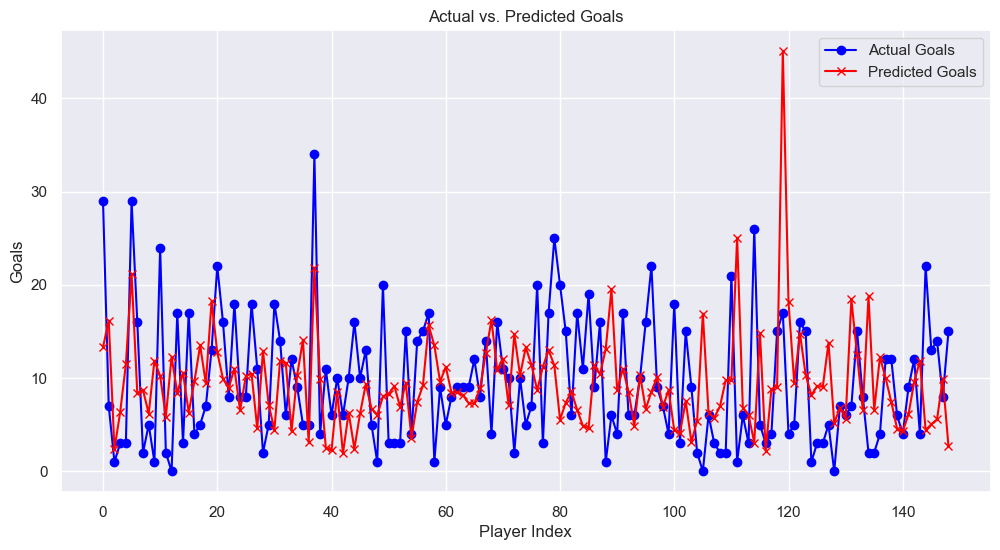

Mean Absolute Error (MAE): 6.413902422050852
Mean Squared Error (MSE): 67.27638273661722


In [1135]:
target_column = '2022G'
goal_columns = [col for col in Dfl.columns if col.endswith('G') and col != target_column]
valuable_columns = ['Injury_Sum','ages','minutos', 'position','Currentvalue(M)'] + goal_columns
armax_data = Dfl[[target_column] + valuable_columns]
armax_data_filled = armax_data.fillna(armax_data.mean())


train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=365)
train_y = train_data['2022G']
train_X = train_data.drop(['2022G'], axis=1)
test_y = test_data['2022G']
test_X = test_data.drop(['2022G'], axis=1)

model = SARIMAX(train_y, exog=train_X, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

test_X_reset = test_X.reset_index(drop=True)
test_y_reset = test_y.reset_index(drop=True)
predictions = fitted_model.predict(start=0, end=len(test_y_reset) - 1, exog=test_X_reset)

mae = mean_absolute_error(test_y_reset, predictions)
mse = mean_squared_error(test_y_reset, predictions)
r2 = r2_score(test_y_reset, predictions)

plt.figure(figsize=(12, 6))
plt.plot(test_y_reset.index, test_y_reset, label='Actual Goals', color='blue', marker='o')
plt.plot(test_y_reset.index, predictions, label='Predicted Goals', color='red', marker='x')
plt.title('Actual vs. Predicted Goals')
plt.xlabel('Player Index')
plt.ylabel('Goals')
plt.legend()
plt.show()

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


### Better performance needed than 6.41 MAE

In [140]:
valuable_columns

['Injury_Sum',
 'ages',
 'minutos',
 'position',
 'Currentvalue(M)',
 '2010G',
 '2011G',
 '2012G',
 '2013G',
 '2014G',
 '2015G',
 '2016G',
 '2017G',
 '2018G',
 '2019G',
 '2020G',
 '2021G',
 '2023G']

### Checking for assumption: Multicollineairty

In [145]:
selected_columns = ['Injury_Sum', 'ages', 'minutos', 'position', 'Currentvalue(M)']

vif_data = pd.DataFrame()
vif_data["feature"] = selected_columns
vif_data["VIF"] = [variance_inflation_factor(train_X[selected_columns].values, i) for i in range(len(selected_columns))]

vif_data

feature       VIF
0       Injury_Sum  2.011767
1             ages  7.784954
2          minutos  5.512193
3         position  2.406547
4  Currentvalue(M)  1.450481

In [165]:
target_column="2022G"
goal_columns = [col for col in Dfl.columns if col.endswith('G') and col != target_column and col != "2023G"]
goal_columns

['2010G',
 '2011G',
 '2012G',
 '2013G',
 '2014G',
 '2015G',
 '2016G',
 '2017G',
 '2018G',
 '2019G',
 '2020G',
 '2021G']

In [200]:
Dfl.loc[Dfl["position"] != 1, "Currentvalue(M)"] = Dfl.loc[Dfl["position"] != 1, "Currentvalue(M)"] / 2

### boxcox Transformation leaded minor progress

In [233]:
Dfl.to_csv("Anovusikim.csv")

In [1140]:
target_column = '2022G'
valuable_columns = ['ages','position','minutos',"Assist"] + goal_columns 
armax_data = Dfl[[target_column] + valuable_columns]

armax_data_filled = armax_data.fillna(armax_data.mean())

min_target_value = armax_data_filled[target_column].min()
shift = 0
if min_target_value <= 0:
    shift = abs(min_target_value) + 1
    armax_data_filled[target_column] += shift

armax_data_filled[target_column], lambda_value = boxcox(armax_data_filled[target_column])

train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=365)

train_y = train_data[target_column]
train_X = train_data.drop([target_column], axis=1)
test_y = test_data[target_column]
test_X = test_data.drop([target_column], axis=1)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

model = SARIMAX(train_y, exog=train_X_scaled, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

test_predictions = fitted_model.get_prediction(start=0, end=len(test_X)-1, exog=test_X_scaled).predicted_mean
test_predictions_exp = inv_boxcox(test_predictions, lambda_value) - shift  
test_y_exp = inv_boxcox(test_y, lambda_value) - shift  

train_predictions = fitted_model.get_prediction(start=0, end=len(train_X)-1, exog=train_X_scaled).predicted_mean
train_predictions_exp = inv_boxcox(train_predictions, lambda_value) - shift 
train_y_exp = inv_boxcox(train_y, lambda_value) - shift 

test_mae = mean_absolute_error(test_y_exp, test_predictions_exp)
test_rmse = sqrt(mean_squared_error(test_y_exp, test_predictions_exp))
train_mae = mean_absolute_error(train_y_exp, train_predictions_exp)
train_rmse = sqrt(mean_squared_error(train_y_exp, train_predictions_exp))

print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Train Mean Absolute Error (MAE):", train_mae)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test Mean Absolute Error (MAE): 6.237983233603715
Test Root Mean Squared Error (RMSE): 7.817919571487031
Train Mean Absolute Error (MAE): 4.578893754959847
Train Root Mean Squared Error (RMSE): 6.140642752676469


### Log transform performed similarly to boxcox transformation

In [262]:
target_column = '2022G'
valuable_columns = ['Injury_Sum', 'ages', 'minutos', 'position', 'Currentvalue(M)',"Assist"] + goal_columns
armax_data = Dfl[[target_column] + valuable_columns]

armax_data_filled = armax_data.fillna(armax_data.mean())

armax_data_filled[target_column] = np.log1p(armax_data_filled[target_column])

train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=40)

train_y = train_data[target_column]
train_X = train_data.drop([target_column], axis=1)
test_y = test_data[target_column]
test_X = test_data.drop([target_column], axis=1)

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

model = SARIMAX(train_y, exog=train_X_scaled, order=(2, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

test_predictions = fitted_model.get_prediction(start=0, end=len(test_X)-1, exog=test_X_scaled).predicted_mean
test_predictions_exp = np.expm1(test_predictions) 
test_y_exp = np.expm1(test_y)  

train_predictions = fitted_model.get_prediction(start=0, end=len(train_X)-1, exog=train_X_scaled).predicted_mean
train_predictions_exp = np.expm1(train_predictions) 
train_y_exp = np.expm1(train_y)  

test_mae = mean_absolute_error(test_y_exp, test_predictions_exp)
test_rmse = sqrt(mean_squared_error(test_y_exp, test_predictions_exp))
train_mae = mean_absolute_error(train_y_exp, train_predictions_exp)
train_rmse = sqrt(mean_squared_error(train_y_exp, train_predictions_exp))

test_data_with_name = test_data.copy()
test_data_with_name['Predicted_2022G'] = test_predictions_exp
test_data_with_name['2022G'] = test_y_exp  

test_data_with_name = test_data_with_name.reset_index()
final_dataframe = test_data_with_name.merge(Dfl[['Name']], how='left', left_on='index', right_index=True)

final_columns = ['Name'] + valuable_columns + ['2022G', 'Predicted_2022G']
final_dataframe = final_dataframe[final_columns]

print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Train Mean Absolute Error (MAE):", train_mae)
print("Train Root Mean Squared Error (RMSE):", train_rmse) 

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test Mean Absolute Error (MAE): 6.279794039239009
Test Root Mean Squared Error (RMSE): 9.406603967041079
Train Mean Absolute Error (MAE): 4.602628651881881
Train Root Mean Squared Error (RMSE): 6.581810963620866


### Implementing Scaling lead to minor progress aswell

In [264]:
target_column = '2022G'
valuable_columns = ['Injury_Sum','ages', 'position','minutos', 'Currentvalue(M)','Assist'] + goal_columns
armax_data = Dfl[[target_column] + valuable_columns]

armax_data_filled = armax_data.fillna(armax_data.mean())

train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=40)

train_y = train_data[target_column]
train_X = train_data.drop([target_column], axis=1)
test_y = test_data[target_column]
test_X = test_data.drop([target_column], axis=1)

scaler = StandardScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

model = SARIMAX(train_y, exog=train_X_scaled, order=(2, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

test_indices = range(len(test_X_scaled))
predictions = fitted_model.get_prediction(start=test_indices[0], end=test_indices[-1], exog=test_X_scaled)
predictions = predictions.predicted_mean

test_data_reset = test_data.reset_index()
test_data_with_name = test_data_reset.merge(Dfl[['Name']], how='left', left_on='index', right_index=True)
test_data_with_name['Predicted_2022G'] = predictions.values
final_columns = ['Name'] + valuable_columns + ['2022G', 'Predicted_2022G']
final_dataframe = test_data_with_name[final_columns]

test_mae = mean_absolute_error(test_y, test_predictions)
test_rmse = sqrt(mean_squared_error(test_y, test_predictions))
train_mae = mean_absolute_error(train_y, train_predictions)
train_rmse = sqrt(mean_squared_error(train_y, train_predictions))

print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Train Mean Absolute Error (MAE):", train_mae)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test Mean Absolute Error (MAE): 5.9399775130167285
Test Root Mean Squared Error (RMSE): 8.19915880778278
Train Mean Absolute Error (MAE): 4.551534122007754
Train Root Mean Squared Error (RMSE): 5.950875534456556


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1149]:
target_column = '2022G'
valuable_columns = ['Injury_Sum','ages', 'position','minutos', 'Currentvalue(M)','Assist'] + goal_columns
armax_data = Dfl[[target_column] + valuable_columns]

armax_data_filled = armax_data.fillna(armax_data.mean())

train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=40)

train_y = train_data[target_column]
train_X = train_data.drop([target_column], axis=1)
test_y = test_data[target_column]
test_X = test_data.drop([target_column], axis=1)

scaler = StandardScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

model = SARIMAX(train_y, exog=train_X_scaled, order=(2, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

test_indices = range(len(test_X_scaled))
predictions = fitted_model.get_prediction(start=test_indices[0], end=test_indices[-1], exog=test_X_scaled)
predictions = predictions.predicted_mean

test_data_reset = test_data.reset_index()
test_data_with_name = test_data_reset.merge(Dfl[['Name']], how='left', left_on='index', right_index=True)
test_data_with_name['Predicted_2022G'] = predictions.values
final_columns = ['Name'] + valuable_columns + ['2022G', 'Predicted_2022G']
final_dataframe = test_data_with_name[final_columns]

test_mae = mean_absolute_error(test_y, test_predictions)
test_rmse = sqrt(mean_squared_error(test_y, test_predictions))
train_mae = mean_absolute_error(train_y, train_predictions)
train_rmse = sqrt(mean_squared_error(train_y, train_predictions))

print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Train Mean Absolute Error (MAE):", train_mae)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test Mean Absolute Error (MAE): 6.948629870501979
Test Root Mean Squared Error (RMSE): 9.928534277636679
Train Mean Absolute Error (MAE): 7.06097494601119
Train Root Mean Squared Error (RMSE): 9.566505350301307


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1224]:
target_column = '2022G'
valuable_columns = ['Injury_Sum','ages', 'position','minutos', 'Currentvalue(M)','Assist'] + goal_columns
armax_data = Dfl[[target_column] + valuable_columns] #'Name'

armax_data_filled = armax_data.fillna(armax_data.mean())

train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=40)

train_y = train_data[target_column]
train_X = train_data.drop([target_column], axis=1)
test_y = test_data[target_column]
test_X = test_data.drop([target_column], axis=1)

scaler = StandardScaler()

train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

model = SARIMAX(train_y, exog=train_X_scaled, order=(2, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
fitted_model = model.fit(disp=False)

test_indices = range(len(test_X_scaled))
predictions = fitted_model.get_prediction(start=test_indices[0], end=test_indices[-1], exog=test_X_scaled)
predictions = predictions.predicted_mean

test_data_reset = test_data.reset_index()
test_data_with_name = test_data_reset.merge(Dfl[['Name']], how='left', left_on='index', right_index=True)
test_data_with_name['Predicted_2022G'] = predictions.values
final_columns = ['Name'] + valuable_columns + ['2022G', 'Predicted_2022G']
final_dataframe = test_data_with_name[final_columns]

test_mae = mean_absolute_error(test_y, test_predictions)
test_rmse = sqrt(mean_squared_error(test_y, test_predictions))
train_mae = mean_absolute_error(train_y, train_predictions)
train_rmse = sqrt(mean_squared_error(train_y, train_predictions))

print("Test Mean Absolute Error (MAE):", test_mae)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Train Mean Absolute Error (MAE):", train_mae)
print("Train Root Mean Squared Error (RMSE):", train_rmse)

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test Mean Absolute Error (MAE): 4.436251262606442
Test Root Mean Squared Error (RMSE): 5.569546620113736
Train Mean Absolute Error (MAE): 7.06097494601119
Train Root Mean Squared Error (RMSE): 9.566505350301307


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Analyzing model

In [1223]:
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  2022G   No. Observations:                  592
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1858.696
Date:                Tue, 19 Dec 2023   AIC                           3763.392
Time:                        14:52:52   BIC                           3864.096
Sample:                             0   HQIC                          3802.626
                                - 592                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.8589      0.286     -3.004      0.003      -1.419      -0.299
x2             1.7003      0.650      2.615      0.009       0.426       2.975
x3             0.2659      0.269      0.989      0.3

In [1227]:
coefs = fitted_model.params
feature_weights = coefs[:19]
feature_names = train_X.columns
weights_dict = dict(zip(feature_names, feature_weights))

In [1228]:
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': feature_weights})
weights_df

Feature    Weight
x1        Injury_Sum -0.858883
x2              ages  1.700297
x3          position  0.265945
x4           minutos -1.419338
x5   Currentvalue(M)  1.978873
x6            Assist  0.285275
x7             2010G -1.233521
x8             2011G  0.861030
x9             2012G -0.125929
x10            2013G  0.331739
x11            2014G  0.651398
x12            2015G  0.017719
x13            2016G -0.309366
x14            2017G  0.304905
x15            2018G  0.269148
x16            2019G -0.036962
x17            2020G  0.526500
x18            2021G  1.257313
x19            2023G  1.528994

In [1217]:
final_dataframe

Name  Injury_Sum  ages  \
0                                    Stephan El Sha...          47    31   
1                                       Keito Nakamura           1    23   
2                                    Callum Hudson-...          58    23   
3                                    Federico Bonaz...          14    26   
4                                    Francisco Conc...          14    20   
..                                                 ...         ...   ...   
144                                     Thijs Dallinga           0    23   
145                                     Luciano Gondou           0    22   
146                                         Harry Kane          80    30   
147                                        Jérémy Doku          50    21   
148                                        Joshua King          42    31   

     position  minutos  Currentvalue(M)  Assist      2010G      2011G  \
0           0    28447              2.5      53   9.000000   4.000000   
1           0    10314              6.0      20   6.666667   6.666667   
2           0    12748              6.0      41   6.857143   6.857143   
3           1    13163              4.0      10   6.000000   6.000000   
4           2     4163              4.0      13   2.250000   2.250000   
..        ...      ...              ...     ...        ...        ...   
144         1    12711             12.0      17  13.166667  13.166667   
145         1     6079              7.5       7   3.666667   3.666667   
146         1    40963            110.0      87   5.000000  10.000000   
147         0     8459             30.0      24   2.800000   2.800000   
148         1    25736              4.1      50   5.000000   3.000000   

         2012G  ...      2015G      2016G      2017G      2018G  2019G  2020G  \
0    19.000000  ...  11.000000  12.000000   9.000000  15.000000    0.0    2.0   
1     6.666667  ...   6.666667   6.666667   6.000000   7.000000   11.0    3.0   
2     6.857143  ...   6.857143   8.000000  21.000000   6.000000    4.0    5.0   
3     6.000000  ...   1.000000   2.000000   0.000000   8.000000    6.0    3.0   
4     2.250000  ...   2.250000   2.250000   2.250000   2.250000    0.0    4.0   
..         ...  ...        ...        ...        ...        ...    ...    ...   
144  13.166667  ...  13.166667  13.166667  13.000000  17.000000    2.0    3.0   
145   3.666667  ...   3.666667   3.666667   3.666667   3.666667    0.0    6.0   
146   5.000000  ...  28.000000  35.000000  41.000000  24.000000   24.0   33.0   
147   2.800000  ...   2.800000   2.800000   2.800000   0.000000    4.0    4.0   
148   2.000000  ...   7.000000  16.000000   9.000000  12.000000    6.0    3.0   

     2021G      2023G  2022G  Predicted_2022G  
0      7.0   2.000000    9.0        -3.991976  
1     12.0   1.000000   17.0        14.723736  
2      3.0   1.000000    1.0        -2.682915  
3     12.0   1.000000    2.0         5.372038  
4      3.0   2.000000    6.0        26.276849  
..     ...        ...    ...              ...  
144   36.0   8.000000   18.0        11.122354  
145    5.0   3.666667   15.0         5.633428  
146   27.0  22.000000   32.0        19.941625  
147    2.0   4.000000    7.0        10.161160  
148    5.0   4.000000    7.0        10.547503  

[149 rows x 22 columns]

In [1218]:
final_dataframe['diff']=final_dataframe['2022G']-final_dataframe['Predicted_2022G']
final_dataframe.sort_values(by="diff").to_csv("Anovu.csv")

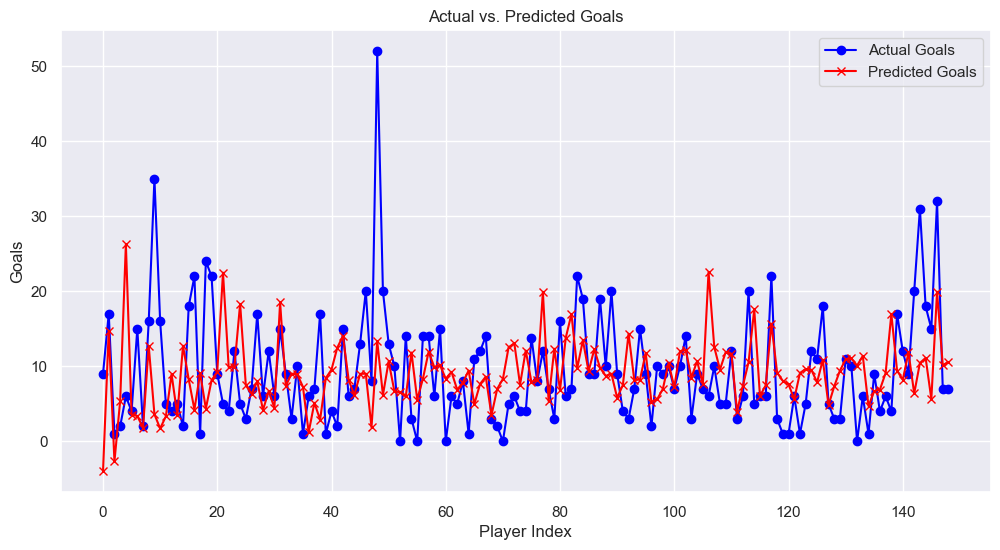

In [1222]:
plt.figure(figsize=(12, 6))
plt.plot(final_dataframe.index, final_dataframe['2022G'], label='Actual Goals', color='blue', marker='o')
plt.plot(final_dataframe.index, final_dataframe['Predicted_2022G'], label='Predicted Goals', color='red', marker='x')
plt.title('Actual vs. Predicted Goals')
plt.xlabel('Player Index')
plt.ylabel('Goals')
plt.legend()
plt.show()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/3547518709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['diff'])


<Axes: xlabel='diff', ylabel='Density'>

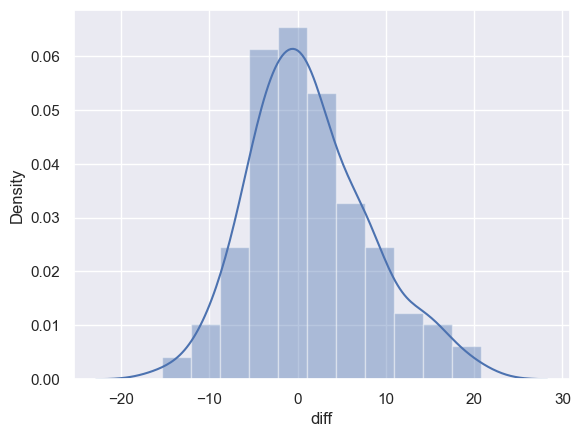

In [647]:
sns.distplot(final_dataframe['diff'])

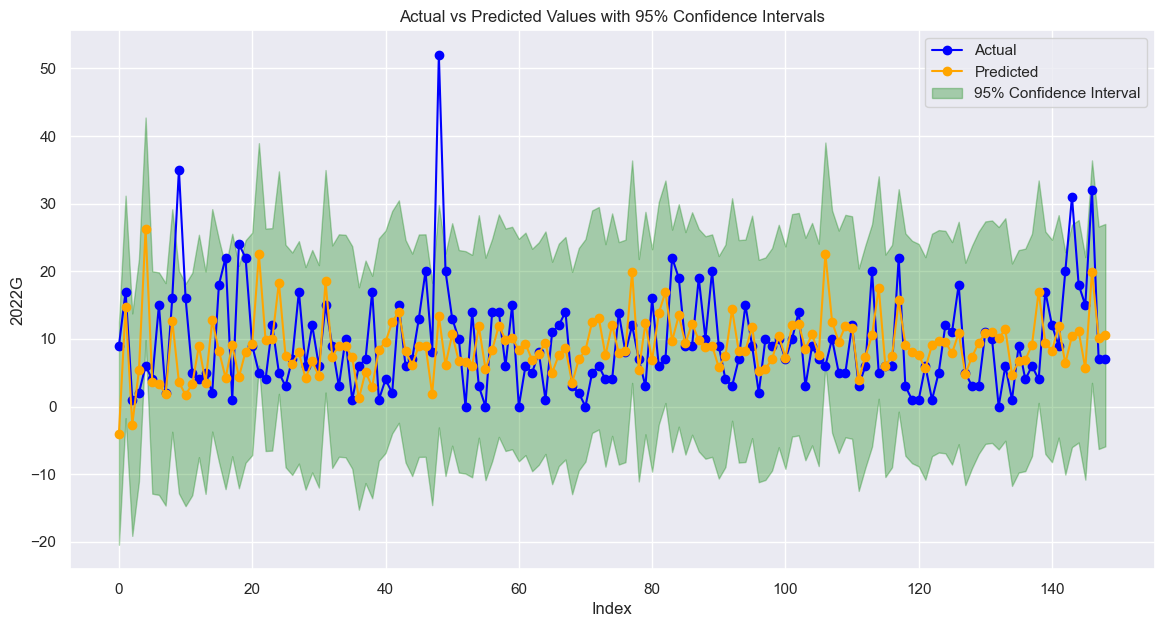

In [1221]:
residuals_std = final_dataframe['diff'].std()

stderr = residuals_std
z_score = 1.96  
lower_bound = final_dataframe['Predicted_2022G'] - z_score * stderr
upper_bound = final_dataframe['Predicted_2022G'] + z_score * stderr

plt.figure(figsize=(14, 7))
plt.plot(final_dataframe.index, final_dataframe['2022G'], label='Actual', color='blue', marker='o')
plt.plot(final_dataframe.index, final_dataframe['Predicted_2022G'], label='Predicted', color='orange', marker='o')

plt.fill_between(final_dataframe.index, lower_bound, upper_bound, color='green', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Index')
plt.ylabel('2022G')
plt.title('Actual vs Predicted Values with 95% Confidence Intervals')
plt.legend()
plt.show()

### Hyperparameter turning

In [169]:
armax_data = Dfl[['2022G'] + valuable_columns]
armax_data_filled = armax_data.fillna(armax_data.mean())
train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=365)
train_y = train_data['2022G']
train_X = train_data.drop(['2022G'], axis=1)
test_y = test_data['2022G']
test_X = test_data.drop(['2022G'], axis=1)

best_mae = float('inf')
best_order = None

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                model = SARIMAX(train_y, exog=train_X, order=(p, d, q), enforce_stationarity=False, enforce_invertibility=False)
                fitted_model = model.fit(disp=False)

                test_indices = range(len(test_X))
                predictions = fitted_model.get_prediction(start=test_indices[0], end=test_indices[-1], exog=test_X)
                predicted_mean = predictions.predicted_mean

                mae = mean_absolute_error(test_y, predicted_mean)

                if mae < best_mae:
                    best_mae = mae
                    best_order = (p, d, q)

            except Exception as e:
                print(f"An error occurred for order {(p, d, q)}: {e}")

print(f"Best Order: {best_order}")
print(f"Best MAE: {best_mae}")

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

Best Order: (2, 1, 1)
Best MAE: 6.539748034944425


### Feature Selection

In [178]:
target_column = '2022G'
valuable_columns = ['Injury_Sum', 'ages', 'Assist', 'minutos', 'Currentvalue(M)',
                    'Individual Award', 'League_Code', 'position']

feature_combinations = []
for r in range(1, len(valuable_columns) + 1):
    feature_combinations.extend(list(itertools.combinations(valuable_columns, r)))

best_feature_combination = None
lowest_mae = float('inf')

for feature_set in feature_combinations:
    selected_columns = [target_column] + list(feature_set) + goal_columns 
    armax_data = Dfl[selected_columns]
    
    armax_data_filled = armax_data.fillna(armax_data.mean())
    
    train_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=365)
    train_y = train_data[target_column]
    train_X = train_data.drop([target_column], axis=1)
    test_y = test_data[target_column]
    test_X = test_data.drop([target_column], axis=1)
    
    model = SARIMAX(train_y, exog=train_X, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
    fitted_model = model.fit(disp=False)
    
    test_indices = range(len(test_X))
    predictions = fitted_model.get_prediction(start=test_indices[0], end=test_indices[-1], exog=test_X)
    predictions = predictions.predicted_mean
    
    mae = mean_absolute_error(test_y, predictions)
    
    if mae < lowest_mae:
        lowest_mae = mae
        best_feature_combination = selected_columns

print("Best Feature Combination:", best_feature_combination)
print("Lowest Mean Absolute Error (MAE):", lowest_mae)


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and w

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and w

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported inde

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best Feature Combination: ['2022G', 'Injury_Sum', 'League_Code', '2010G', '2011G', '2012G', '2013G', '2014G', '2015G', '2016G', '2017G', '2018G', '2019G', '2020G', '2021G']
Lowest Mean Absolute Error (MAE): 6.401977590675517


### Lowest MAE achieved for test set is anually 6-7 which is still high , I decided to transpose data and structure it better for SARIMAX model to be able to do AR calculations , which will lead better results

In [730]:
goal_columns2=goal_columns.copy()
goal_columns2.append('2022G')
goal_columns2

['2010G',
 '2011G',
 '2012G',
 '2013G',
 '2014G',
 '2015G',
 '2016G',
 '2017G',
 '2018G',
 '2019G',
 '2020G',
 '2021G',
 '2022G']

In [872]:
goal_columns2.reverse()

In [892]:
Dflages=Dfl[Dfl['ages']>20]
Dflages=Dflages.reset_index()
Dflages=Dflages.drop(['index'],axis=1)

In [1083]:
#for testing with team column 
DflagesT=DflwithT[DflwithT['ages']>20]
DflagesT=DflagesT.reset_index()
DflagesT=DflagesT.drop(['index'],axis=1)

In [1124]:
Teamanalysis=df_long2[df_long2['Goals']>25]['Team']

In [1128]:
Teamanalysis.value_counts().head(15)

Barcelona           11
Paris SG            11
Al-Nassr            11
Bayern Munich        9
AS Roma              8
Al-Ittihad Club      8
Lazio                5
Al-Duhail SC         4
Al-Hilal             4
Man City             4
PSV Eindhoven        4
Atlético Madrid      4
Ajax                 3
Fenerbahce           3
Al-Shamal SC         3
Name: Team, dtype: int64

### Adjusting data better structure for SARIMAX 

In [1112]:
#For team data
id_vars2 = ['Name', 'Injury_Sum', 'ages', 'Assist', 'minutos', 'Currentvalue(M)', 'Individual Award', 'League_Code', 'position','Team','Team_Category']
df_long2 = DflagesT.melt(id_vars=id_vars2, value_vars=goal_columns2, var_name='Year', value_name='Goals')
df_long2['Year'] = df_long2['Year'].str.extract('(\d+)').astype(int)
df_long2 = df_long2.sort_values(by=['Name', 'Year'])
df_long2

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/3481111323.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df_long2 = DflagesT.melt(id_vars=id_vars2, value_vars=goal_columns2, var_name='Year', value_name='Goals')


Name  Injury_Sum  ages  \
7894                                  Aaron Connolly          59    23   
7265                                  Aaron Connolly          59    23   
6636                                  Aaron Connolly          59    23   
6007                                  Aaron Connolly          59    23   
5378                                  Aaron Connolly          59    23   
...                                              ...         ...   ...   
2942                                    Álvaro Djaló           0    24   
2313                                    Álvaro Djaló           0    24   
1684                                    Álvaro Djaló           0    24   
1055                                    Álvaro Djaló           0    24   
426                                     Álvaro Djaló           0    24   

      Assist  minutos  Currentvalue(M)  Individual Award  League_Code  \
7894       6     9306              3.5                 1            0   
7265       6     9306              3.5                 1            0   
6636       6     9306              3.5                 1            0   
6007       6     9306              3.5                 1            0   
5378       6     9306              3.5                 1            0   
...      ...      ...              ...               ...          ...   
2942       9     4076              4.0                 0           10   
2313       9     4076              4.0                 0           10   
1684       9     4076              4.0                 0           10   
1055       9     4076              4.0                 0           10   
426        9     4076              4.0                 0           10   

      position        Team  Team_Category  Year     Goals  
7894         1  Hull City             0.0  2010  7.333333  
7265         1  Hull City             0.0  2011  7.333333  
6636         1  Hull City             0.0  2012  7.333333  
6007         1  Hull City             0.0  2013  7.333333  
5378         1  Hull City             0.0  2014  7.333333  
...        ...         ...            ...   ...       ...  
2942         0   SC Braga             0.0  2018  0.000000  
2313         0   SC Braga             0.0  2019  3.000000  
1684         0   SC Braga             0.0  2020  1.000000  
1055         0   SC Braga             0.0  2021  1.333333  
426          0   SC Braga             0.0  2022  5.000000  

[8177 rows x 13 columns]

In [902]:
id_vars = ['Name', 'Injury_Sum', 'ages', 'Assist', 'minutos', 'Currentvalue(M)', 'Individual Award', 'League_Code', 'position']
df_long = Dflages.melt(id_vars=id_vars, value_vars=goal_columns2, var_name='Year', value_name='Goals')
df_long['Year'] = df_long['Year'].str.extract('(\d+)').astype(int)
df_long = df_long.sort_values(by=['Name', 'Year'])
df_long

Name  Injury_Sum  ages  \
7906                                  Aaron Connolly          59    23   
7276                                  Aaron Connolly          59    23   
6646                                  Aaron Connolly          59    23   
6016                                  Aaron Connolly          59    23   
5386                                  Aaron Connolly          59    23   
...                                              ...         ...   ...   
2946                                    Álvaro Djaló           0    24   
2316                                    Álvaro Djaló           0    24   
1686                                    Álvaro Djaló           0    24   
1056                                    Álvaro Djaló           0    24   
426                                     Álvaro Djaló           0    24   

      Assist  minutos  Currentvalue(M)  Individual Award  League_Code  \
7906       6     9306              3.5                 1            0   
7276       6     9306              3.5                 1            0   
6646       6     9306              3.5                 1            0   
6016       6     9306              3.5                 1            0   
5386       6     9306              3.5                 1            0   
...      ...      ...              ...               ...          ...   
2946       9     4076              2.0                 0           10   
2316       9     4076              2.0                 0           10   
1686       9     4076              2.0                 0           10   
1056       9     4076              2.0                 0           10   
426        9     4076              2.0                 0           10   

      position  Year  Goals  
7906         1  2010    7.0  
7276         1  2011    7.0  
6646         1  2012    7.0  
6016         1  2013    7.0  
5386         1  2014    7.0  
...        ...   ...    ...  
2946         0  2018    0.0  
2316         0  2019    3.0  
1686         0  2020    1.0  
1056         0  2021    4.0  
426          0  2022    5.0  

[8190 rows x 11 columns]

In [903]:
#Adjustung age after transposing
intyears=[]
for i,year in enumerate(goal_columns2):
    intyears.append(int(year[0:4]))
intyears

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

In [1087]:
for years in intyears:
    GAP=2023-years
    df_long2.loc[df_long2['Year']==years,'ages']=df_long2.loc[df_long2['Year']==years,'ages']-GAP
df_long2

Name  Injury_Sum  ages  \
7894                                  Aaron Connolly          59    10   
7265                                  Aaron Connolly          59    11   
6636                                  Aaron Connolly          59    12   
6007                                  Aaron Connolly          59    13   
5378                                  Aaron Connolly          59    14   
...                                              ...         ...   ...   
2942                                    Álvaro Djaló           0    19   
2313                                    Álvaro Djaló           0    20   
1684                                    Álvaro Djaló           0    21   
1055                                    Álvaro Djaló           0    22   
426                                     Álvaro Djaló           0    23   

      Assist  minutos  Currentvalue(M)  Individual Award  League_Code  \
7894       6     9306              3.5                 1            0   
7265       6     9306              3.5                 1            0   
6636       6     9306              3.5                 1            0   
6007       6     9306              3.5                 1            0   
5378       6     9306              3.5                 1            0   
...      ...      ...              ...               ...          ...   
2942       9     4076              4.0                 0           10   
2313       9     4076              4.0                 0           10   
1684       9     4076              4.0                 0           10   
1055       9     4076              4.0                 0           10   
426        9     4076              4.0                 0           10   

      position  Team_Category  Year     Goals  
7894         1            0.0  2010  7.333333  
7265         1            0.0  2011  7.333333  
6636         1            0.0  2012  7.333333  
6007         1            0.0  2013  7.333333  
5378         1            0.0  2014  7.333333  
...        ...            ...   ...       ...  
2942         0            0.0  2018  0.000000  
2313         0            0.0  2019  3.000000  
1684         0            0.0  2020  1.000000  
1055         0            0.0  2021  1.333333  
426          0            0.0  2022  5.000000  

[8177 rows x 12 columns]

In [904]:
for years in intyears:
    GAP=2023-years
    df_long.loc[df_long['Year']==years,'ages']=df_long.loc[df_long['Year']==years,'ages']-GAP
df_long

Name  Injury_Sum  ages  \
7906                                  Aaron Connolly          59    10   
7276                                  Aaron Connolly          59    11   
6646                                  Aaron Connolly          59    12   
6016                                  Aaron Connolly          59    13   
5386                                  Aaron Connolly          59    14   
...                                              ...         ...   ...   
2946                                    Álvaro Djaló           0    19   
2316                                    Álvaro Djaló           0    20   
1686                                    Álvaro Djaló           0    21   
1056                                    Álvaro Djaló           0    22   
426                                     Álvaro Djaló           0    23   

      Assist  minutos  Currentvalue(M)  Individual Award  League_Code  \
7906       6     9306              3.5                 1            0   
7276       6     9306              3.5                 1            0   
6646       6     9306              3.5                 1            0   
6016       6     9306              3.5                 1            0   
5386       6     9306              3.5                 1            0   
...      ...      ...              ...               ...          ...   
2946       9     4076              2.0                 0           10   
2316       9     4076              2.0                 0           10   
1686       9     4076              2.0                 0           10   
1056       9     4076              2.0                 0           10   
426        9     4076              2.0                 0           10   

      position  Year  Goals  
7906         1  2010    7.0  
7276         1  2011    7.0  
6646         1  2012    7.0  
6016         1  2013    7.0  
5386         1  2014    7.0  
...        ...   ...    ...  
2946         0  2018    0.0  
2316         0  2019    3.0  
1686         0  2020    1.0  
1056         0  2021    4.0  
426          0  2022    5.0  

[8190 rows x 11 columns]

In [738]:
df_long.to_csv("Bacivusikim.csv")

In [1088]:
df_long2['Year'].value_counts()

2010    629
2011    629
2012    629
2013    629
2014    629
2015    629
2016    629
2017    629
2018    629
2019    629
2020    629
2021    629
2022    629
Name: Year, dtype: int64

In [905]:
df_long['Year'].value_counts()

2010    630
2011    630
2012    630
2013    630
2014    630
2015    630
2016    630
2017    630
2018    630
2019    630
2020    630
2021    630
2022    630
Name: Year, dtype: int64

In [906]:
train = df_long[df_long['Year'] < 2022]
test = df_long[df_long['Year'] == 2022]

y_train = train['Goals']
y_test = test['Goals']

exogenous_columns = ['ages','minutos' ,'position','Assist','League_Code']
X_train = train[exogenous_columns]
X_test = test[exogenous_columns]

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.tsa.statespace.SARIMAX(y_train, exog=X_train, order=(3, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

predictions_train = results.predict(start=0, end=len(y_train)-1, exog=X_train)
predictions_test = results.predict(start=0, end=len(y_test)-1, exog=X_test)

mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}')

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03747D+00    |proj g|=  4.30769D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     18      1     0     0   6.634D-02   3.037D+00
  F =   3.0374359842144250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Training MAE: 3.482709560869165, Training RMSE: 5.045445610043207
Test MAE: 6.122957802836283, Test RMSE: 8.32825192132244



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


### Scaling didn't contribute significantly

In [849]:
train = df_long[df_long['Year'] < 2022]
test = df_long[df_long['Year'] == 2022]

y_train = train['Goals']
y_test = test['Goals']

exogenous_columns = ['ages', 'minutos', 'position', 'Assist', 'League_Code']
X_train = train[exogenous_columns]
X_test = test[exogenous_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

model = sm.tsa.statespace.SARIMAX(y_train, exog=X_train_scaled, order=(8, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

predictions_train = results.predict(start=0, end=len(y_train)-1, exog=X_train_scaled)
predictions_test = results.predict(start=0, end=len(y_test)-1, exog=X_test_scaled)

mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}')


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03409D+00    |proj g|=  7.51901D-03

At iterate    5    f=  3.03177D+00    |proj g|=  3.01368D-03

At iterate   10    f=  3.03170D+00    |proj g|=  6.63343D-04

At iterate   15    f=  3.03163D+00    |proj g|=  6.63379D-04

At iterate   20    f=  3.03160D+00    |proj g|=  1.09900D-03

At iterate   25    f=  3.03156D+00    |proj g|=  1.10162D-03

At iterate   30    f=  3.03156D+00    |proj g|=  2.42761D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

### Transforming decreased Test MAE , which is positive sign

In [1028]:
train = df_long[df_long['Year'] < 2022]
test = df_long[df_long['Year'] == 2022]

y_train = np.log(train['Goals'] + 1)  
y_test = np.log(test['Goals'] + 1)

exogenous_columns = ['ages', 'minutos', 'position', 'Assist', 'League_Code']
X_train = train[exogenous_columns]
X_test = test[exogenous_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

model = sm.tsa.statespace.SARIMAX(y_train, exog=X_train_scaled, order=(8, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()


predictions_train = results.predict(start=0, end=len(y_train)-1, exog=X_train_scaled)

start_index = len(y_train)
end_index = start_index + len(y_test) - 1
predictions_test = results.predict(start=start_index, end=end_index, exog=X_test_scaled)

predictions_train = np.exp(predictions_train) - 1
predictions_test = np.exp(predictions_test) - 1

mae_train = mean_absolute_error(train['Goals'], predictions_train)
rmse_train = np.sqrt(mean_squared_error(train['Goals'], predictions_train))

mae_test = mean_absolute_error(test['Goals'], predictions_test)
rmse_test = np.sqrt(mean_squared_error(test['Goals'], predictions_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}')

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.04643D+00    |proj g|=  3.98639D-02

At iterate    5    f=  1.04496D+00    |proj g|=  3.16220D-03

At iterate   10    f=  1.04493D+00    |proj g|=  4.71259D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     10     12      1     0     0   4.713D-06   1.045D+00
  F =   1.0449252477882671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Training MAE: 3.5428955130579993, Training RMSE: 5.303673736893517
Tes

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Implementing Smoothing , which tells model to consider recent years more , accomplished better results

In [1148]:
#Creating copy before next steps
Copy=df_long.copy()

In [1134]:
train = df_long[df_long['Year'] < 2022]
test = df_long[df_long['Year'] == 2022]

y_train = train['Goals']
y_test = test['Goals']

exogenous_columns = ['ages', 'minutos', 'position']  #'Assist'
X_train = train[exogenous_columns]
X_test = test[exogenous_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

alpha = 0.9  
y_train_smoothed = y_train.ewm(alpha=alpha).mean()

model = sm.tsa.statespace.SARIMAX(y_train_smoothed, exog=X_train_scaled, order=(10, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

predictions_train = results.predict(start=0, end=len(y_train)-1, exog=X_train_scaled)

start_index = len(y_train)
end_index = start_index + len(y_test) - 1
predictions_test = results.predict(start=start_index, end=end_index, exog=X_test_scaled)

mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}')

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93032D+00    |proj g|=  7.74517D-03


 This problem is unconstrained.



At iterate    5    f=  2.92739D+00    |proj g|=  6.06920D-03

At iterate   10    f=  2.92721D+00    |proj g|=  2.10461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     14     19      1     0     0   1.052D-05   2.927D+00
  F =   2.9272112317223602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Training MAE: 3.467452803416187, Training RMSE: 5.025565346851982
Test MAE: 5.250539072644764, Test RMSE: 7.082010158516876


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


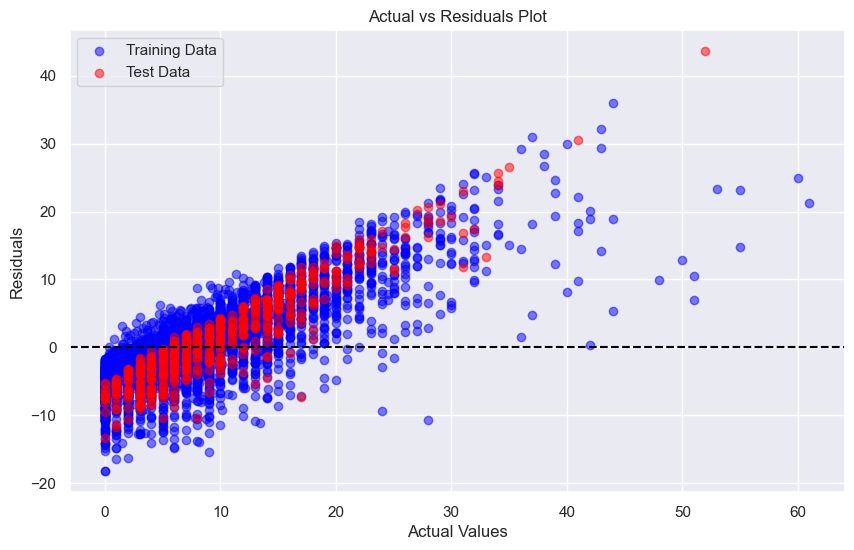

In [1026]:
residuals_train = y_train - predictions_train
residuals_test = final_df[2022]-final_df['Predicted_Goals_2022']

actual_combined = np.concatenate([y_train, final_df[2022]])
residuals_combined = np.concatenate([residuals_train, residuals_test])

plt.figure(figsize=(10, 6))
plt.scatter(y_train, residuals_train, color='blue', label='Training Data', alpha=0.5)
plt.scatter(final_df[2022], residuals_test, color='red', label='Test Data', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals Plot')
plt.legend()
plt.show()

In [1003]:
grouped_data = df_long.groupby(['Name', 'Year']).agg({'Goals': 'sum'}).reset_index()
merged_train = pd.merge(grouped_data[grouped_data['Year'] < 2022], train, on=['Name', 'Year'], suffixes=('_grouped', '_train'))
merged_test = pd.merge(grouped_data[grouped_data['Year'] == 2022], test, on=['Name', 'Year'], suffixes=('_grouped', '_test'))
merged_test['Predicted_Goals_2022'] = predictions_test.values
final_columns = ['Name', 'Year', 'ages','minutos' ,'position','Assist','League_Code', 'Goals_grouped']
final_df_train = merged_train[final_columns]
final_df_test = merged_test[final_columns + ['Predicted_Goals_2022']]

In [760]:
final_df = pd.concat([final_df_train, final_df_test], ignore_index=True)

In [1004]:
df_pivoted = grouped_data.pivot(index='Name', columns='Year', values='Goals')
df_pivoted.reset_index(inplace=True)

In [1005]:
df_pivoted

Year                                             Name       2010       2011  \
0                                      Aaron Connolly   7.000000   7.000000   
1                                     Abde Ezzalzouli   2.750000   2.750000   
2                                           Abel Ruiz   4.571429   4.571429   
3                                      Adam Armstrong  11.272727  11.272727   
4                                          Adam Buksa   7.200000   7.200000   
..                                                ...        ...        ...   
624                                           Vitinha   6.200000   6.200000   
625                                            Wesley   4.500000   4.500000   
626                                      Yuri Alberto   8.333333   8.333333   
627                                              Zizo   5.700000   5.700000   
628                                      Álvaro Djaló   4.000000   4.000000   

Year      2012      2013       2014       2015  2016   2017   2018  2019  \
0     7.000000  7.000000   7.000000   7.000000  6.00   9.00  16.00   7.0   
1     2.750000  2.750000   2.750000   2.750000  2.75   2.75   2.75   0.0   
2     4.571429  4.571429   4.571429   4.571429  2.00   4.00   3.00   5.0   
3     0.000000  6.000000  11.000000  20.000000  6.00  12.00   9.00  17.0   
4     7.200000  1.000000   0.000000   1.000000  3.00   6.00  11.00  14.0   
..         ...       ...        ...        ...   ...    ...    ...   ...   
624   6.200000  6.200000   6.200000   6.200000  6.20   6.20   1.00   7.0   
625   4.500000  4.500000   4.500000   4.500000  4.50   4.50   5.00   5.0   
626   8.333333  8.333333   8.333333   8.333333  0.00   1.00   0.00  12.0   
627   5.700000  0.000000   2.000000   2.000000  3.00   2.00   1.00   9.0   
628   4.000000  4.000000   4.000000   4.000000  4.00   4.00   0.00   3.0   

Year  2020  2021  2022  
0      2.0   4.0   2.0  
1      2.0   4.0   6.0  
2     11.0   5.0  12.0  
3     29.0   2.0   3.0  
4     17.0  11.0   1.0  
..     ...   ...   ...  
624    5.0  14.0  15.0  
625    5.0   3.0   4.0  
626   19.0  18.0  15.0  
627   10.0  21.0  22.0  
628    1.0   4.0   5.0  

[629 rows x 14 columns]

In [1006]:
final_df_test=final_df_test.drop(["Year"],axis=1)
final_df_test

Name  ages  minutos  position  \
0                                     Aaron Connolly    22     9306         1   
1                                    Abde Ezzalzouli    20     5701         0   
2                                          Abel Ruiz    22    13602         1   
3                                     Adam Armstrong    25    26923         1   
4                                         Adam Buksa    26    13323         1   
..                                               ...   ...      ...       ...   
625                                          Vitinha    22     7545         1   
626                                           Wesley    23     9998         0   
627                                     Yuri Alberto    21    14239         1   
628                                             Zizo    26    24606         4   
629                                     Álvaro Djaló    23     4076         0   

     Assist  League_Code  Goals_grouped  Predicted_Goals_2022  
0         6            0            2.0              5.252245  
1         9            3            6.0              4.550414  
2        24           10           12.0              6.535620  
3        43            0            3.0             10.086761  
4        22            5            1.0              7.448860  
..      ...          ...            ...                   ...  
625      11            6           15.0              6.300278  
626      20           21            4.0              7.148337  
627      19           21           15.0              7.501893  
628      66            4           22.0             10.185547  
629       9           10            5.0              5.915320  

[630 rows x 8 columns]

In [1007]:
final_df = pd.merge(final_df_test,df_pivoted, on='Name', how='inner')

In [1009]:
final_df['diff']=final_df[2022]-final_df['Predicted_Goals_2022']

In [1010]:
desired_order = ['Name','ages','Assist','minutos','League_Code','Goals_grouped','diff','Predicted_Goals_2022',2022,                   2010,                   2011,
2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]  
final_df = final_df[desired_order]

In [1011]:
final_df

Name  ages  Assist  minutos  \
0                                     Aaron Connolly    22       6     9306   
1                                    Abde Ezzalzouli    20       9     5701   
2                                          Abel Ruiz    22      24    13602   
3                                     Adam Armstrong    25      43    26923   
4                                         Adam Buksa    26      22    13323   
..                                               ...   ...     ...      ...   
625                                          Vitinha    22      11     7545   
626                                           Wesley    23      20     9998   
627                                     Yuri Alberto    21      19    14239   
628                                             Zizo    26      66    24606   
629                                     Álvaro Djaló    23       9     4076   

     League_Code  Goals_grouped       diff  Predicted_Goals_2022  2022  \
0              0            2.0  -3.252245              5.252245   2.0   
1              3            6.0   1.449586              4.550414   6.0   
2             10           12.0   5.464380              6.535620  12.0   
3              0            3.0  -7.086761             10.086761   3.0   
4              5            1.0  -6.448860              7.448860   1.0   
..           ...            ...        ...                   ...   ...   
625            6           15.0   8.699722              6.300278  15.0   
626           21            4.0  -3.148337              7.148337   4.0   
627           21           15.0   7.498107              7.501893  15.0   
628            4           22.0  11.814453             10.185547  22.0   
629           10            5.0  -0.915320              5.915320   5.0   

          2010  ...      2012      2013       2014       2015  2016   2017  \
0     7.000000  ...  7.000000  7.000000   7.000000   7.000000  6.00   9.00   
1     2.750000  ...  2.750000  2.750000   2.750000   2.750000  2.75   2.75   
2     4.571429  ...  4.571429  4.571429   4.571429   4.571429  2.00   4.00   
3    11.272727  ...  0.000000  6.000000  11.000000  20.000000  6.00  12.00   
4     7.200000  ...  7.200000  1.000000   0.000000   1.000000  3.00   6.00   
..         ...  ...       ...       ...        ...        ...   ...    ...   
625   6.200000  ...  6.200000  6.200000   6.200000   6.200000  6.20   6.20   
626   4.500000  ...  4.500000  4.500000   4.500000   4.500000  4.50   4.50   
627   8.333333  ...  8.333333  8.333333   8.333333   8.333333  0.00   1.00   
628   5.700000  ...  5.700000  0.000000   2.000000   2.000000  3.00   2.00   
629   4.000000  ...  4.000000  4.000000   4.000000   4.000000  4.00   4.00   

      2018  2019  2020  2021  
0    16.00   7.0   2.0   4.0  
1     2.75   0.0   2.0   4.0  
2     3.00   5.0  11.0   5.0  
3     9.00  17.0  29.0   2.0  
4    11.00  14.0  17.0  11.0  
..     ...   ...   ...   ...  
625   1.00   7.0   5.0  14.0  
626   5.00   5.0   5.0   3.0  
627   0.00  12.0  19.0  18.0  
628   1.00   9.0  10.0  21.0  
629   0.00   3.0   1.0   4.0  

[630 rows x 21 columns]

### Analyzing model deeper

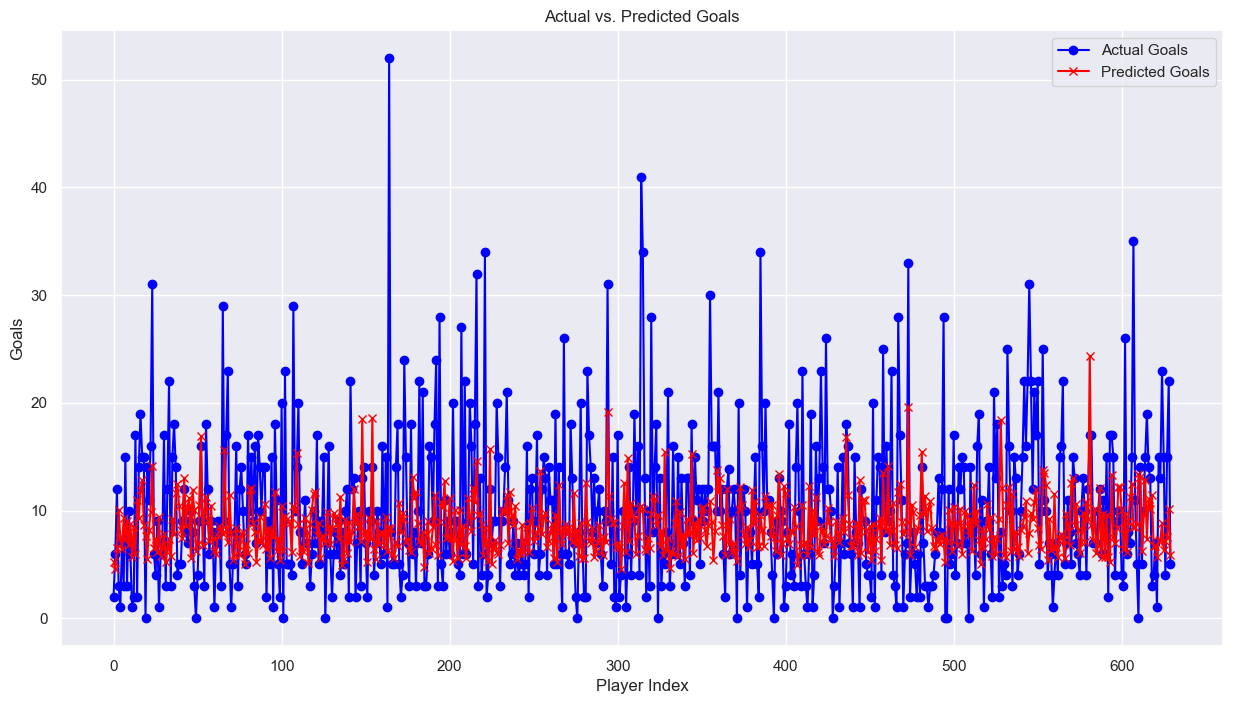

In [1033]:
player_index = list(range(len(final_df[2022])))

plt.figure(figsize=(15, 8))

plt.plot(player_index, final_df[2022], 'o-', label='Actual Goals', color='blue')

plt.plot(player_index, predictions_test, 'x-', label='Predicted Goals', color='red')

plt.title('Actual vs. Predicted Goals')
plt.xlabel('Player Index')
plt.ylabel('Goals')
plt.legend()
plt.show()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/1581068612.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['diff'])


<Axes: xlabel='diff', ylabel='Density'>

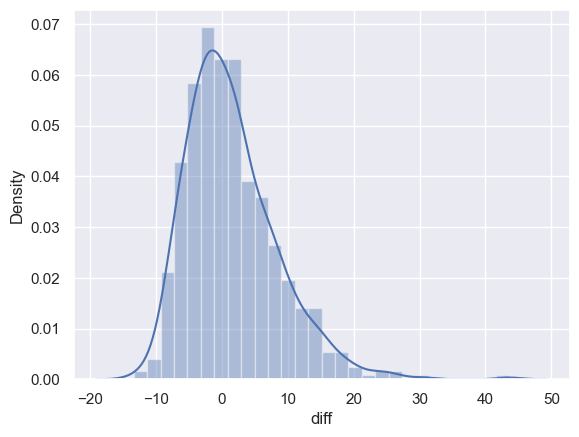

In [1027]:
sns.distplot(final_df['diff'])

In [1002]:
results.params

const      7.303332
x1         0.909068
x2         1.939127
x3        -0.113641
ar.L1      0.420850
ar.L2      0.054784
ar.L3      0.057465
ar.L4      0.027351
ar.L5      0.008368
ar.L6      0.039377
ar.L7      0.004752
ar.L8      0.020750
ar.L9      0.021738
ar.L10    -0.004759
sigma2    20.419849
dtype: float64

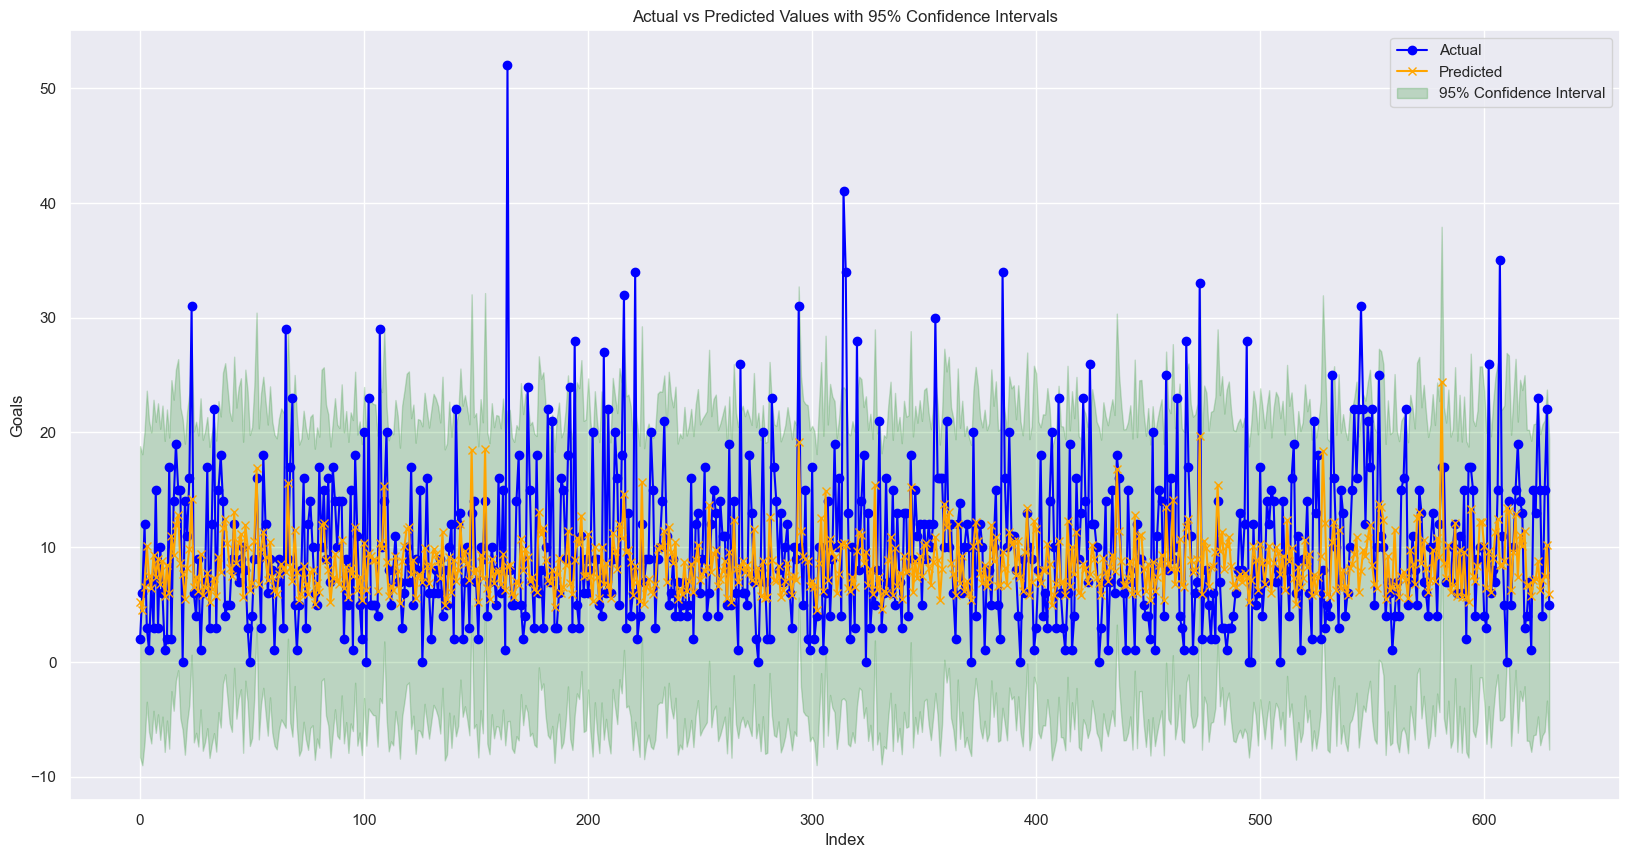

In [1041]:
residuals_test = final_df[2022]-final_df['Predicted_Goals_2022']
residuals_sd = residuals_test .std()
stderr2 = residuals_sd
z_score = 1.96
plt.figure(figsize=(20, 10))
confidence_interval_lower=final_df['Predicted_Goals_2022']-z_score * stderr2
confidence_interval_upper=final_df['Predicted_Goals_2022']+z_score * stderr2
plt.plot(player_index, final_df[2022], 'o-', color='blue', label='Actual')
plt.plot(player_index, predictions_test, 'x-', color='orange', label='Predicted')

plt.fill_between(player_index, confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.2, label='95% Confidence Interval')

plt.title('Actual vs Predicted Values with 95% Confidence Intervals')
plt.xlabel('Index')
plt.ylabel('Goals')
plt.legend(loc='best')
plt.show()


In [773]:
grouped_data.to_csv("Bacivu.csv")

In [1012]:
final_df.sort_values(by='diff').to_csv('Baco.csv')

### While MAE is very good at 3-5 levels , Model has some big residuals due to outliers. It means model struggles with outliers. Will try to solve this problem by adding team data into our dataset

### Trying with teams data I created before

In [1107]:
train = df_long2[df_long2['Year'] < 2022]
test = df_long2[df_long2['Year'] == 2022]

y_train = train['Goals']
y_test = test['Goals']

exogenous_columns = ['ages', 'minutos', 'position','Team_Category']  #'Assist'
X_train = train[exogenous_columns]
X_test = test[exogenous_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

alpha = 0.9  
y_train_smoothed = y_train.ewm(alpha=alpha).mean()

model = sm.tsa.statespace.SARIMAX(y_train_smoothed, exog=X_train_scaled, order=(10, 0, 1), seasonal_order=(0, 0, 0, 0))
results = model.fit()

predictions_train = results.predict(start=0, end=len(y_train)-1, exog=X_train_scaled)

start_index = len(y_train)
end_index = start_index + len(y_test) - 1
predictions_test = results.predict(start=start_index, end=end_index, exog=X_test_scaled)

mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}')

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11017D+00    |proj g|=  6.56108D-01

At iterate    5    f=  2.94975D+00    |proj g|=  5.67211D-02

At iterate   10    f=  2.93642D+00    |proj g|=  5.88854D-03

At iterate   15    f=  2.93545D+00    |proj g|=  5.66003D-03

At iterate   20    f=  2.93475D+00    |proj g|=  1.29502D-03

At iterate   25    f=  2.93470D+00    |proj g|=  3.10625D-04

At iterate   30    f=  2.93469D+00    |proj g|=  3.27797D-04

At iterate   35    f=  2.93469D+00    |proj g|=  3.01259D-04

At iterate   40    f=  2.93468D+00    |proj g|=  2.45668D-03

At iterate   45    f=  2.93465D+00    |proj g|=  2.32621D-03


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  2.93461D+00    |proj g|=  8.67892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     56      1     0     0   8.679D-04   2.935D+00
  F =   2.9346091006760364     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Training MAE: 3.522538441524585, Training RMSE: 5.063023511109527
Test MAE: 5.21239353571797, Test RMSE: 7.046383143674508


/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### No progress at all, meaning this way is not enough to deal with outliers

In [ ]:
grouped_data = df_long2.groupby(['Name', 'Year']).agg({'Goals': 'sum'}).reset_index()
merged_train = pd.merge(grouped_data[grouped_data['Year'] < 2022], train, on=['Name', 'Year'], suffixes=('_grouped', '_train'))

merged_test = pd.merge(grouped_data[grouped_data['Year'] == 2022], test, on=['Name', 'Year'], suffixes=('_grouped', '_test'))
merged_test['Predicted_Goals_2022'] = predictions_test.values
final_columns = ['Name', 'Year', 'ages','minutos' ,'position','Assist','League_Code', 'Goals_grouped']
final_df_train = merged_train[final_columns]
final_df_test = merged_test[final_columns + ['Predicted_Goals_2022']]
df_pivoted2 = grouped_data.pivot(index='Name', columns='Year', values='Goals')
df_pivoted2.reset_index(inplace=True)

In [1090]:
grouped_data = df_long2.groupby(['Name', 'Year']).agg({'Goals': 'sum'}).reset_index()
merged_train = pd.merge(grouped_data[grouped_data['Year'] < 2022], train, on=['Name', 'Year'], suffixes=('_grouped', '_train'))
merged_test = pd.merge(grouped_data[grouped_data['Year'] == 2022], test, on=['Name', 'Year'], suffixes=('_grouped', '_test'))
merged_test['Predicted_Goals_2022'] = predictions_test.values
final_columns = ['Name', 'Year', 'ages','minutos' ,'position','Assist','League_Code', 'Goals_grouped']
final_df_train = merged_train[final_columns]
final_df_test = merged_test[final_columns + ['Predicted_Goals_2022']]
final_df_test=final_df_test.drop(["Year"],axis=1)
final_df_test
final_df = pd.merge(final_df_test,df_pivoted2, on='Name', how='inner')
final_df
final_df['diff']=final_df[2022]-final_df['Predicted_Goals_2022']
desired_order = ['Name','ages','Assist','minutos','League_Code','Goals_grouped','diff','Predicted_Goals_2022',2022,                   2010,                   2011,
2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]  
final_df = final_df[desired_order]

In [1091]:
df_pivoted2 = grouped_data.pivot(index='Name', columns='Year', values='Goals')
df_pivoted2.reset_index(inplace=True)

In [1092]:
df_pivoted2

Year                                             Name       2010       2011  \
0                                      Aaron Connolly   7.333333   7.333333   
1                                     Abde Ezzalzouli   2.000000   2.000000   
2                                           Abel Ruiz   5.000000   5.000000   
3                                      Adam Armstrong  11.200000  11.200000   
4                                          Adam Buksa   7.111111   7.111111   
..                                                ...        ...        ...   
623                                           Vitinha   6.750000   6.750000   
624                                            Wesley   4.500000   4.500000   
625                                      Yuri Alberto   8.333333   8.333333   
626                                              Zizo   5.555556   5.555556   
627                                      Álvaro Djaló   1.333333   1.333333   

Year      2012      2013       2014       2015      2016       2017  2018  \
0     7.333333  7.333333   7.333333   7.333333  6.000000   9.000000  16.0   
1     2.000000  2.000000   2.000000   2.000000  2.000000   2.000000   2.0   
2     5.000000  5.000000   5.000000   5.000000  2.000000   4.000000   3.0   
3     0.000000  6.000000  11.000000  20.000000  6.000000  12.000000   9.0   
4     7.111111  1.000000   0.000000   1.000000  3.000000   6.000000  11.0   
..         ...       ...        ...        ...       ...        ...   ...   
623   6.750000  6.750000   6.750000   6.750000  6.750000   6.750000   1.0   
624   4.500000  4.500000   4.500000   4.500000  4.500000   4.500000   5.0   
625   8.333333  8.333333   8.333333   8.333333  0.000000   1.000000   0.0   
626   5.555556  0.000000   2.000000   2.000000  3.000000   2.000000   1.0   
627   1.333333  1.333333   1.333333   1.333333  1.333333   1.333333   0.0   

Year  2019  2020       2021  2022  
0      7.0   2.0   4.000000   2.0  
1      0.0   2.0   4.000000   6.0  
2      5.0  11.0   5.000000  12.0  
3     17.0  29.0   2.000000   3.0  
4     14.0  17.0  11.000000   1.0  
..     ...   ...        ...   ...  
623    7.0   5.0  14.000000  15.0  
624    5.0   5.0   3.000000   4.0  
625   12.0  19.0  18.000000  15.0  
626    9.0  10.0  21.000000  22.0  
627    3.0   1.0   1.333333   5.0  

[628 rows x 14 columns]

In [1093]:
final_df_test=final_df_test.drop(["Year"],axis=1)
final_df_test

Name  ages  minutos  position  \
0                                     Aaron Connolly    22     9306         1   
1                                    Abde Ezzalzouli    20     5701         0   
2                                          Abel Ruiz    22    13602         1   
3                                     Adam Armstrong    25    26923         1   
4                                         Adam Buksa    26    13323         1   
..                                               ...   ...      ...       ...   
624                                          Vitinha    22     7545         1   
625                                           Wesley    23     9998         0   
626                                     Yuri Alberto    21    14239         1   
627                                             Zizo    26    24606         4   
628                                     Álvaro Djaló    23     4076         0   

     Assist  League_Code  Goals_grouped  Predicted_Goals_2022  
0         6            0            2.0              3.896931  
1         9            3            6.0              3.604261  
2        24           10           12.0              5.683447  
3        43            0            3.0              9.191440  
4        22            5            1.0              6.789071  
..      ...          ...            ...                   ...  
624      11            6           15.0              6.237775  
625      20           21            4.0              7.018283  
626      19           21           15.0              7.412096  
627      66            4           22.0              9.966307  
628       9           10            5.0              5.830999  

[629 rows x 8 columns]

In [1094]:
final_df = pd.merge(final_df_test,df_pivoted2, on='Name', how='inner')
final_df

Name  ages  minutos  position  \
0                                     Aaron Connolly    22     9306         1   
1                                    Abde Ezzalzouli    20     5701         0   
2                                          Abel Ruiz    22    13602         1   
3                                     Adam Armstrong    25    26923         1   
4                                         Adam Buksa    26    13323         1   
..                                               ...   ...      ...       ...   
624                                          Vitinha    22     7545         1   
625                                           Wesley    23     9998         0   
626                                     Yuri Alberto    21    14239         1   
627                                             Zizo    26    24606         4   
628                                     Álvaro Djaló    23     4076         0   

     Assist  League_Code  Goals_grouped  Predicted_Goals_2022       2010  \
0         6            0            2.0              3.896931   7.333333   
1         9            3            6.0              3.604261   2.000000   
2        24           10           12.0              5.683447   5.000000   
3        43            0            3.0              9.191440  11.200000   
4        22            5            1.0              6.789071   7.111111   
..      ...          ...            ...                   ...        ...   
624      11            6           15.0              6.237775   6.750000   
625      20           21            4.0              7.018283   4.500000   
626      19           21           15.0              7.412096   8.333333   
627      66            4           22.0              9.966307   5.555556   
628       9           10            5.0              5.830999   1.333333   

          2011  ...      2013       2014       2015      2016       2017  \
0     7.333333  ...  7.333333   7.333333   7.333333  6.000000   9.000000   
1     2.000000  ...  2.000000   2.000000   2.000000  2.000000   2.000000   
2     5.000000  ...  5.000000   5.000000   5.000000  2.000000   4.000000   
3    11.200000  ...  6.000000  11.000000  20.000000  6.000000  12.000000   
4     7.111111  ...  1.000000   0.000000   1.000000  3.000000   6.000000   
..         ...  ...       ...        ...        ...       ...        ...   
624   6.750000  ...  6.750000   6.750000   6.750000  6.750000   6.750000   
625   4.500000  ...  4.500000   4.500000   4.500000  4.500000   4.500000   
626   8.333333  ...  8.333333   8.333333   8.333333  0.000000   1.000000   
627   5.555556  ...  0.000000   2.000000   2.000000  3.000000   2.000000   
628   1.333333  ...  1.333333   1.333333   1.333333  1.333333   1.333333   

     2018  2019  2020       2021  2022  
0    16.0   7.0   2.0   4.000000   2.0  
1     2.0   0.0   2.0   4.000000   6.0  
2     3.0   5.0  11.0   5.000000  12.0  
3     9.0  17.0  29.0   2.000000   3.0  
4    11.0  14.0  17.0  11.000000   1.0  
..    ...   ...   ...        ...   ...  
624   1.0   7.0   5.0  14.000000  15.0  
625   5.0   5.0   5.0   3.000000   4.0  
626   0.0  12.0  19.0  18.000000  15.0  
627   1.0   9.0  10.0  21.000000  22.0  
628   0.0   3.0   1.0   1.333333   5.0  

[629 rows x 21 columns]

In [1095]:
final_df['diff']=final_df[2022]-final_df['Predicted_Goals_2022']

In [1097]:
desired_order = ['Name','ages','Assist','minutos','League_Code','Goals_grouped','diff','Predicted_Goals_2022',2022,                   2010,                   2011,
2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]  
final_df = final_df[desired_order]

In [1102]:
final_df[final_df['Goals_grouped']>30] # Analyzing outliers last time

Name  ages  Assist  minutos  \
23                                   Alexandre Laca...    31      85    37274   
164                                     Erling Haaland    22      48    17474   
216                                         Harry Kane    29      87    40963   
221                                       Hugo Cuypers    25      34    14595   
293                                      Karim Benzema    34     195    58291   
313                                      Kylian Mbappé    23     117    25615   
314                                    Kyogo Furuhashi    27      48    21423   
384                                     Michael Olunga    28      28    17661   
472                                  Robert Lewando...    34     148    60609   
544                                     Victor Osimhen    23      25    14282   
606                                              Pedro    25      26    15174   

     League_Code  Goals_grouped       diff  Predicted_Goals_2022  2022  \
23             6           31.0  17.347163             13.652837  31.0   
164            4           52.0  42.644196              9.355804  52.0   
216            2           32.0  16.760793             15.239207  32.0   
221           11           34.0  25.845579              8.154421  34.0   
293            9           31.0  12.575461             18.424539  31.0   
313            6           41.0  29.723318             11.276682  41.0   
314           28           34.0  24.141178              9.858822  34.0   
384           20           34.0  24.727672              9.272328  34.0   
472            3           33.0  12.983338             20.016662  33.0   
544            8           31.0  22.116412              8.883588  31.0   
606           21           35.0  26.729497              8.270503  35.0   

          2010  ...       2012       2013       2014       2015  2016  2017  \
23    2.000000  ...   4.000000  22.000000  31.000000  23.000000  37.0  17.0   
164  19.285714  ...  19.285714  19.285714  19.285714   0.000000   4.0  12.0   
216   5.000000  ...   5.000000  12.000000  31.000000  28.000000  35.0  41.0   
221   6.857143  ...   6.857143   0.000000   6.857143   0.000000   6.0  22.0   
293  26.000000  ...  20.000000  24.000000  22.000000  28.000000  19.0  12.0   
313  25.375000  ...  25.375000  25.375000   0.000000   4.000000  28.0  21.0   
314  14.333333  ...  14.333333  14.333333  14.333333  14.333333   6.0  16.0   
384  14.333333  ...   0.000000  14.333333   0.000000  13.000000   2.0   6.0   
472   9.000000  ...  36.000000  28.000000  25.000000  42.000000  43.0  41.0   
544  11.000000  ...  11.000000  11.000000  11.000000  11.000000   0.0   0.0   
606  12.571429  ...  12.571429  12.571429  12.571429   0.000000   3.0  12.0   

          2018  2019  2020  2021  
23   19.000000  12.0  17.0   6.0  
164   5.000000  44.0  41.0  29.0  
216  24.000000  24.0  33.0  27.0  
221   6.857143   5.0   2.0  13.0  
293  30.000000  27.0  30.0  44.0  
313  39.000000  30.0  42.0  39.0  
314  12.000000  16.0  16.0  20.0  
384  29.000000  29.0  20.0  30.0  
472  40.000000  55.0  48.0  50.0  
544  20.000000  18.0  10.0  18.0  
606   5.000000  24.0  15.0  29.0  

[11 rows x 21 columns]

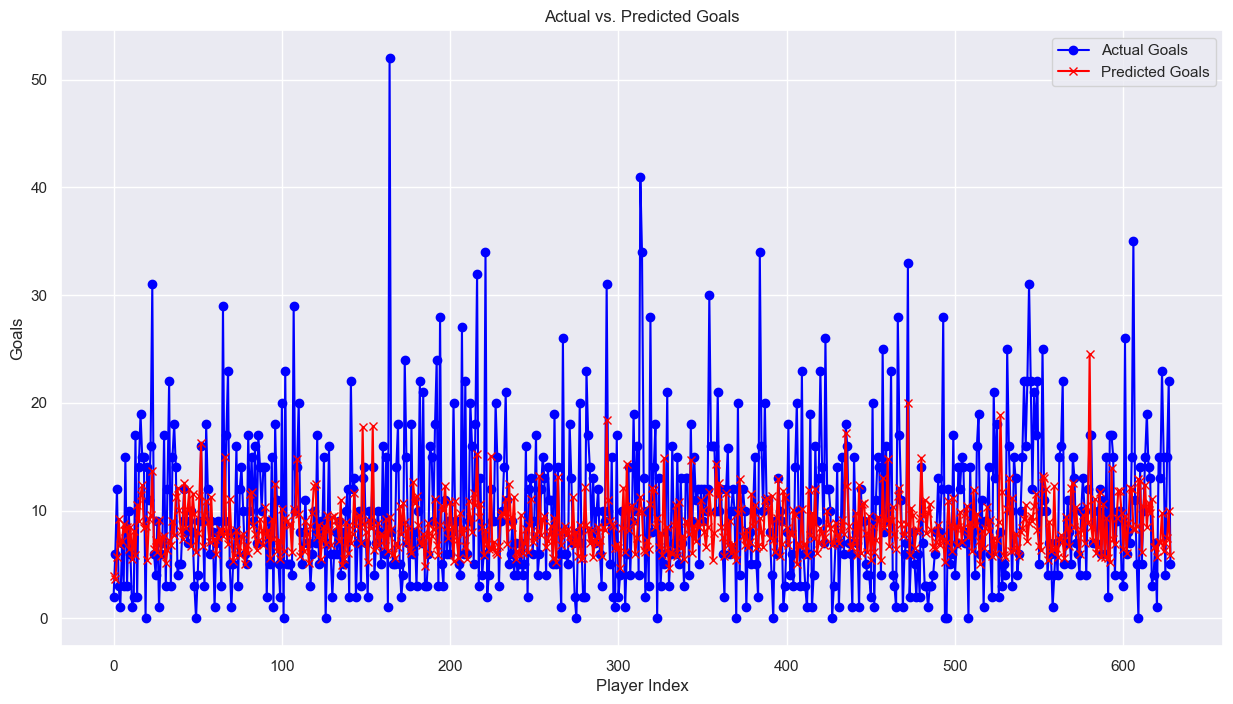

In [1099]:
player_index = list(range(len(final_df[2022])))

plt.figure(figsize=(15, 8))
plt.plot(player_index, final_df[2022], 'o-', label='Actual Goals', color='blue')
plt.plot(player_index, predictions_test, 'x-', label='Predicted Goals', color='red')
plt.title('Actual vs. Predicted Goals')
plt.xlabel('Player Index')
plt.ylabel('Goals')
plt.legend()
plt.show()

In [1101]:
results.params

const      7.463959
x1         0.793604
x2         1.865175
x3        -0.094644
x4         0.415557
ar.L1      0.427050
ar.L2      0.058696
ar.L3      0.061984
ar.L4      0.029073
ar.L5      0.008545
ar.L6      0.040747
ar.L7      0.003011
ar.L8      0.019250
ar.L9      0.017471
ar.L10    -0.007340
sigma2    20.727147
dtype: float64

### Moved back on to previous model after experiencing no progress by implementing model on teams dataset

#### Feature Optimization

In [1160]:
df_long.columns

Index(['Name', 'Injury_Sum', 'ages', 'Assist', 'minutos', 'Currentvalue(M)',
       'Individual Award', 'League_Code', 'position', 'Year', 'Goals'],
      dtype='object')

### As testing every variation of features would cost so much time and resources , I will try assess features based on causation and their coeficcients

In [1162]:
train = df_long[df_long['Year'] < 2022]
test = df_long[df_long['Year'] == 2022]

y_train = train['Goals']
y_test = test['Goals']

exogenous_columns = [ 'Injury_Sum', 'ages', 'Assist', 'minutos', 'Currentvalue(M)',
       'Individual Award', 'League_Code', 'position']  
X_train = train[exogenous_columns]
X_test = test[exogenous_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

alpha = 0.9  
y_train_smoothed = y_train.ewm(alpha=alpha).mean()

model = sm.tsa.statespace.SARIMAX(y_train_smoothed, exog=X_train_scaled, order=(10, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

predictions_train = results.predict(start=0, end=len(y_train)-1, exog=X_train_scaled)

start_index = len(y_train)
end_index = start_index + len(y_test) - 1
predictions_test = results.predict(start=start_index, end=end_index, exog=X_test_scaled)

mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}')

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90597D+00    |proj g|=  5.09774D-03


 This problem is unconstrained.



At iterate    5    f=  2.90424D+00    |proj g|=  2.64304D-03

At iterate   10    f=  2.90416D+00    |proj g|=  7.99325D-04

At iterate   15    f=  2.90413D+00    |proj g|=  4.97511D-04

At iterate   20    f=  2.90407D+00    |proj g|=  9.45474D-04

At iterate   25    f=  2.90406D+00    |proj g|=  4.64416D-04

At iterate   30    f=  2.90406D+00    |proj g|=  1.98492D-04

At iterate   35    f=  2.90406D+00    |proj g|=  1.10066D-04

At iterate   40    f=  2.90406D+00    |proj g|=  2.62227D-05

At iterate   45    f=  2.90406D+00    |proj g|=  1.38529D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     46     50   

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [1165]:
results.params # I observe minute column compliacting things , so let's proceed without it

const      7.303080
x1        -0.566102
x2         0.980323
x3        -0.111811
x4         1.718465
x5         1.147886
x6         1.158184
x7         0.128136
x8        -0.010312
ar.L1      0.395341
ar.L2      0.043178
ar.L3      0.057858
ar.L4      0.023611
ar.L5      0.004471
ar.L6      0.036029
ar.L7     -0.002605
ar.L8      0.014899
ar.L9      0.018591
ar.L10     0.000133
sigma2    19.495874
dtype: float64

### Without Minute column

In [1229]:
train = df_long[df_long['Year'] < 2022]
test = df_long[df_long['Year'] == 2022]

y_train = train['Goals']
y_test = test['Goals']

exogenous_columns = [ 'Injury_Sum', 'ages', 'Assist', 'Currentvalue(M)',
       'Individual Award', 'position','League_Code'] 
X_train = train[exogenous_columns]
X_test = test[exogenous_columns]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

alpha = 0.9  
y_train_smoothed = y_train.ewm(alpha=alpha).mean()

model = sm.tsa.statespace.SARIMAX(y_train_smoothed, exog=X_train_scaled, order=(10, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

predictions_train = results.predict(start=0, end=len(y_train)-1, exog=X_train_scaled)

start_index = len(y_train)
end_index = start_index + len(y_test) - 1
predictions_test = results.predict(start=start_index, end=end_index, exog=X_test_scaled)

mae_train = mean_absolute_error(y_train, predictions_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))

mae_test = mean_absolute_error(y_test, predictions_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Test MAE: {mae_test}, Test RMSE: {rmse_test}')

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90990D+00    |proj g|=  3.47125D-03

At iterate    5    f=  2.90928D+00    |proj g|=  2.44170D-03

At iterate   10    f=  2.90922D+00    |proj g|=  3.20920D-04

At iterate   15    f=  2.90922D+00    |proj g|=  2.46064D-04

At iterate   20    f=  2.90922D+00    |proj g|=  6.72298D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   19     24     28      1     0     0   1.735D-05   2.909D+00
  F =   2.9092173685558462     

CONVERG

/Users/aa085/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [1254]:
feature_names=[]
feature_names.append("Cons")
feature_names=feature_names+X_train.columns.tolist() + goal_columns[0:10]
feature_names.append("Error")

In [1257]:
coefs = results.params
feature_weights = coefs[:19]
weights_dict = dict(zip(feature_names, feature_weights))
weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': feature_weights})
weights_df # Now I can observe every column has some value to add to model

Feature     Weight
const               Cons   7.302643
x1            Injury_Sum  -0.526919
x2                  ages   1.179587
x3                Assist   1.211585
x4       Currentvalue(M)   1.136433
x5      Individual Award   1.307779
x6              position  -0.039003
x7           League_Code   0.117730
ar.L1              2010G   0.407436
ar.L2              2011G   0.047201
ar.L3              2012G   0.061121
ar.L4              2013G   0.028623
ar.L5              2014G   0.004744
ar.L6              2015G   0.035511
ar.L7              2016G  -0.001048
ar.L8              2017G   0.012027
ar.L9              2018G   0.018965
ar.L10             2019G  -0.002066
sigma2             Error  19.698065

In [1192]:
grouped_data = df_long2.groupby(['Name', 'Year']).agg({'Goals': 'sum'}).reset_index()
merged_train = pd.merge(grouped_data[grouped_data['Year'] < 2022], train, on=['Name', 'Year'], suffixes=('_grouped', '_train'))
merged_test = pd.merge(grouped_data[grouped_data['Year'] == 2022], test, on=['Name', 'Year'], suffixes=('_grouped', '_test'))

In [1193]:
merged_test['Predicted_Goals_2022'] = predictions_test.drop_duplicates().values

In [1194]:
final_columns = ['Name', 'Year', 'ages','Injury_Sum','position','Assist','Currentvalue(M)',
       'Individual Award','League_Code', 'Goals_grouped']
final_df_train = merged_train[final_columns] 

In [1195]:
final_df_train = merged_train[final_columns]
final_df_test = merged_test[final_columns + ['Predicted_Goals_2022']]
final_df_test=final_df_test.drop(["Year"],axis=1)

In [1196]:
final_df = pd.merge(final_df_test,df_pivoted2, on='Name', how='inner')
final_df

Name  ages  Injury_Sum  \
0                                     Aaron Connolly    22          59   
1                                    Abde Ezzalzouli    20           6   
2                                          Abel Ruiz    22          15   
3                                     Adam Armstrong    25          10   
4                                         Adam Buksa    26          60   
..                                               ...   ...         ...   
624                                          Vitinha    22           5   
625                                           Wesley    23          31   
626                                     Yuri Alberto    21           0   
627                                             Zizo    26           9   
628                                     Álvaro Djaló    23           0   

     position  Assist  Currentvalue(M)  Individual Award  League_Code  \
0           1       6             3.50                 1            0   
1           0       9             7.50                 1            3   
2           1      24            14.00                 1           10   
3           1      43            14.00                 0            0   
4           1      22             5.00                 0            5   
..        ...     ...              ...               ...          ...   
624         1      11            15.00                 1            6   
625         0      20             2.75                 0           21   
626         1      19            16.00                 0           21   
627         4      66             2.50                 1            4   
628         0       9             2.00                 0           10   

     Goals_grouped  Predicted_Goals_2022  ...      2013       2014       2015  \
0              2.0              6.201627  ...  7.333333   7.333333   7.333333   
1              6.0              7.550785  ...  2.000000   2.000000   2.000000   
2             12.0              9.219002  ...  5.000000   5.000000   5.000000   
3              3.0              8.121021  ...  6.000000  11.000000  20.000000   
4              1.0              6.071046  ...  1.000000   0.000000   1.000000   
..             ...                   ...  ...       ...        ...        ...   
624           15.0              9.972993  ...  6.750000   6.750000   6.750000   
625            4.0              6.671848  ...  4.500000   4.500000   4.500000   
626           15.0              7.610925  ...  8.333333   8.333333   8.333333   
627           22.0             12.110865  ...  0.000000   2.000000   2.000000   
628            5.0              6.530416  ...  1.333333   1.333333   1.333333   

         2016       2017  2018  2019  2020       2021  2022  
0    6.000000   9.000000  16.0   7.0   2.0   4.000000   2.0  
1    2.000000   2.000000   2.0   0.0   2.0   4.000000   6.0  
2    2.000000   4.000000   3.0   5.0  11.0   5.000000  12.0  
3    6.000000  12.000000   9.0  17.0  29.0   2.000000   3.0  
4    3.000000   6.000000  11.0  14.0  17.0  11.000000   1.0  
..        ...        ...   ...   ...   ...        ...   ...  
624  6.750000   6.750000   1.0   7.0   5.0  14.000000  15.0  
625  4.500000   4.500000   5.0   5.0   5.0   3.000000   4.0  
626  0.000000   1.000000   0.0  12.0  19.0  18.000000  15.0  
627  3.000000   2.000000   1.0   9.0  10.0  21.000000  22.0  
628  1.333333   1.333333   0.0   3.0   1.0   1.333333   5.0  

[629 rows x 23 columns]

In [1204]:
final_df.sort_values(by='diff').to_csv("Players5.csv")

In [1197]:
final_df['diff']=final_df[2022]-final_df['Predicted_Goals_2022']
desired_order = ['Name','Injury_Sum', 'ages', 'Assist', 'Currentvalue(M)',
       'Individual Award', 'League_Code', 'position','Goals_grouped','diff','Predicted_Goals_2022',2022,                   2010,                   2011,
2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]  
final_df = final_df[desired_order]

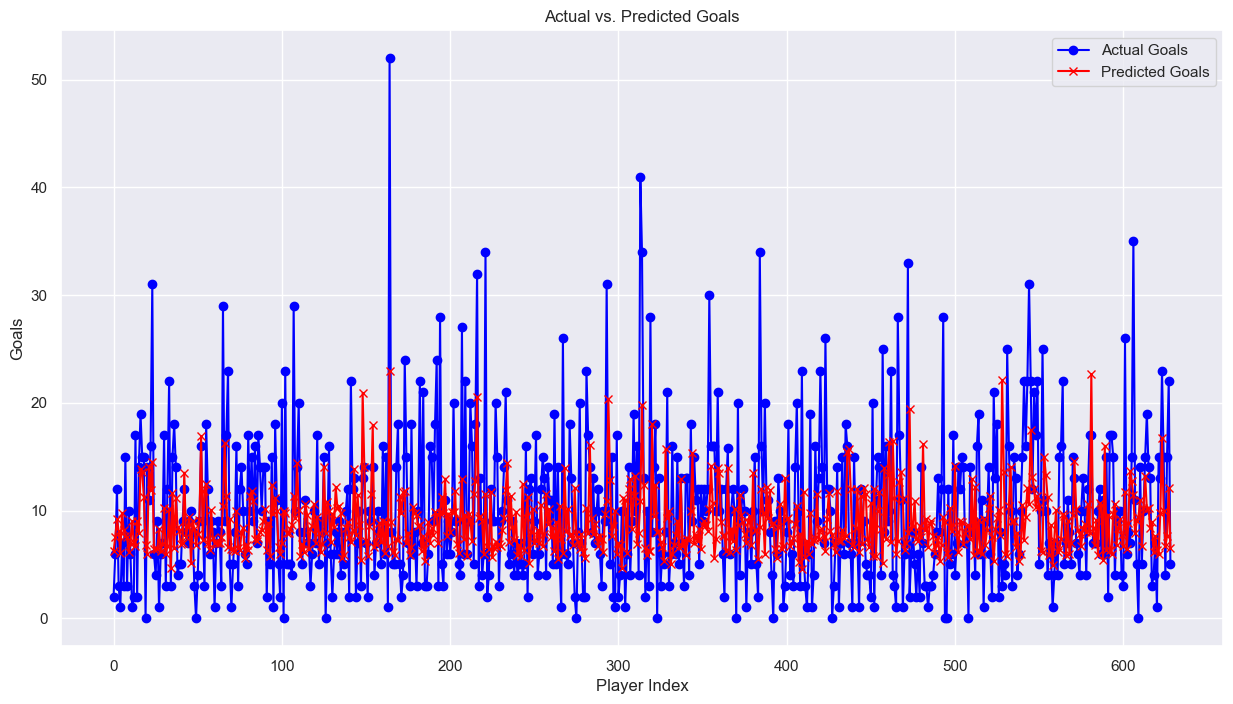

In [1199]:
player_index = list(range(len(final_df[2022])))

plt.figure(figsize=(15, 8))
plt.plot(player_index, final_df[2022], 'o-', label='Actual Goals', color='blue')
plt.plot(player_index, predictions_test.drop_duplicates(), 'x-', label='Predicted Goals', color='red')
plt.title('Actual vs. Predicted Goals')
plt.xlabel('Player Index')
plt.ylabel('Goals')
plt.legend()
plt.show()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/3547518709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['diff'])


<Axes: xlabel='diff', ylabel='Density'>

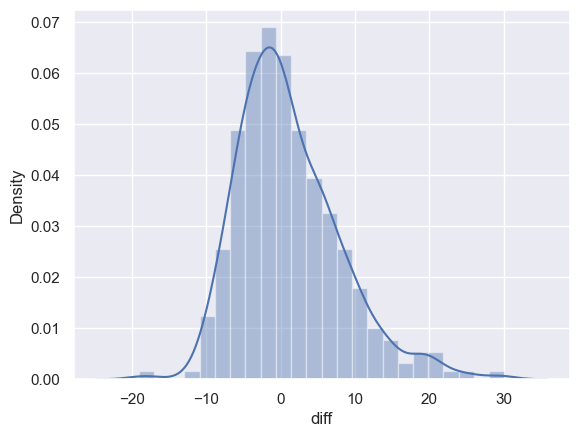

In [1202]:
sns.distplot(final_df['diff']) #Normality

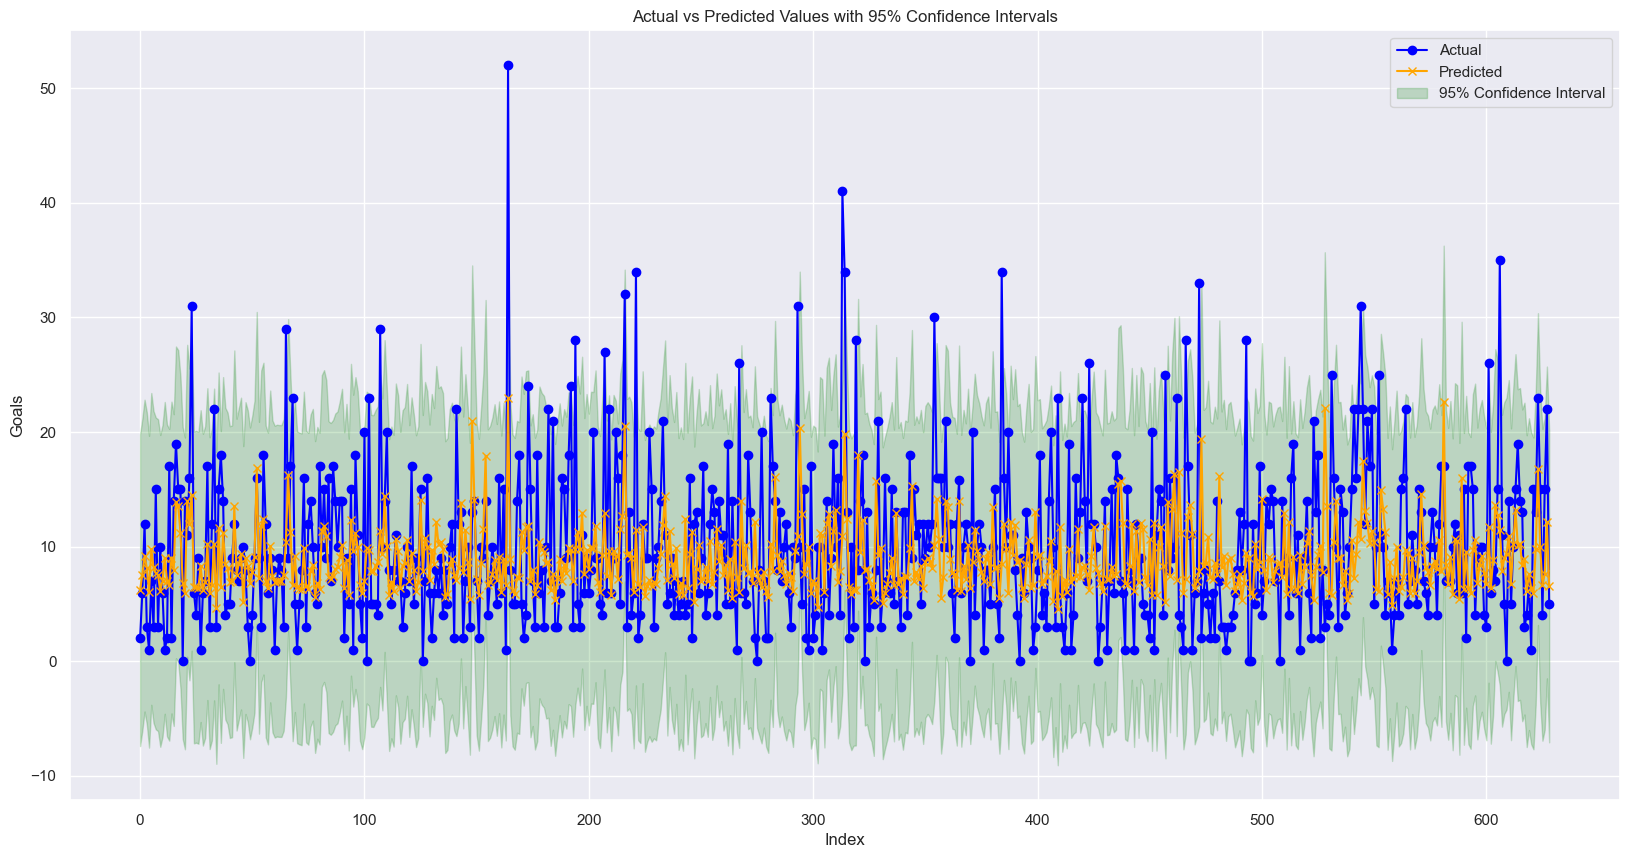

In [1201]:
residuals_test = final_df[2022]-final_df['Predicted_Goals_2022']
residuals_sd = residuals_test .std()
stderr2 = residuals_sd
z_score = 1.96
plt.figure(figsize=(20, 10))
confidence_interval_lower=final_df['Predicted_Goals_2022']-z_score * stderr2
confidence_interval_upper=final_df['Predicted_Goals_2022']+z_score * stderr2
plt.plot(player_index, final_df[2022], 'o-', color='blue', label='Actual')
plt.plot(player_index, predictions_test.drop_duplicates(), 'x-', color='orange', label='Predicted')

plt.fill_between(player_index, confidence_interval_lower, confidence_interval_upper, color='green', alpha=0.2, label='95% Confidence Interval')

plt.title('Actual vs Predicted Values with 95% Confidence Intervals')
plt.xlabel('Index')
plt.ylabel('Goals')
plt.legend(loc='best')
plt.show()

### Autocorrelation 

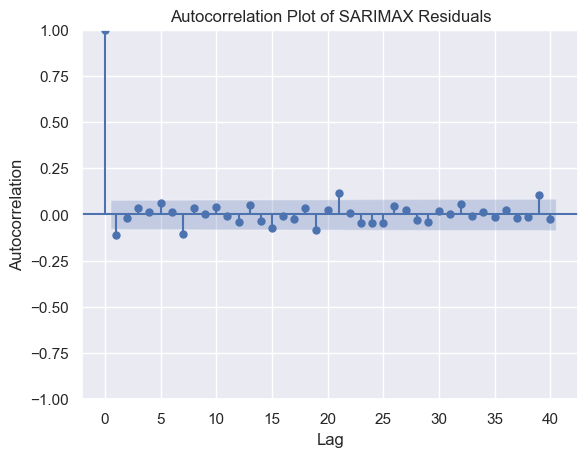

In [1208]:
residuals_test = final_df[2022]-final_df['Predicted_Goals_2022']

plot_acf(residuals_test, lags=40)  
plt.title("Autocorrelation Plot of SARIMAX Residuals")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

### No significant pattern in residuals

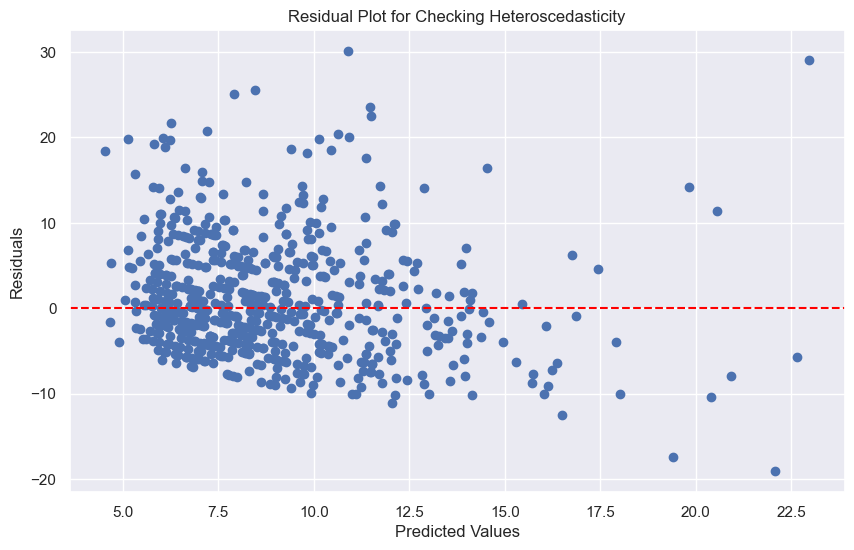

In [1209]:
residuals_test = final_df[2022]-final_df['Predicted_Goals_2022']
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Predicted_Goals_2022'], residuals_test)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Checking Heteroscedasticity')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Ensembling XgBoosting,LSTM and Linear Regression to see if I can achieve better MAE and RMSE

In [1261]:
Dfl

Name  Injury_Sum  ages  \
0                                          Jack Clarke           0    22   
1                                        Luka Ivanusec          19    24   
2                                    Michael Gregor...          39    29   
3                                         Isaiah Jones           8    24   
4                                           Mathys Tel           4    18   
..                                                 ...         ...   ...   
736                                           Raphinha          27    26   
737                                  Gabriel Strefezza           6    26   
738                                      Omar Marmoush           9    24   
739                                  Firas Al-Buraikan           0    23   
740                                       Ricardo Pepi           1    20   

     Assist  minutos  Currentvalue(M)  Individual Award  League_Code  \
0        29    10920             7.50                 0            0   
1        34    19879             6.00                 0            1   
2        29    24092             8.00                 0            2   
3        23     9737             1.75                 0            0   
4         2     1857            50.00                 0            2   
..      ...      ...              ...               ...          ...   
736      53    21080            30.00                 0            3   
737      26    15832             5.00                 0            8   
738      13     8627             8.00                 0            2   
739      15     6763             4.00                 0            9   
740       9     7427             9.00                 0            1   

     position      2010M  ...  2021A  2021Min  2022M  2022G  2022A  2022Min  \
0           0   3.166667  ...    9.0   2776.0   50.0   11.0   14.0   4179.0   
1           0   4.375000  ...    8.0   3379.0   48.0   13.0    5.0   3799.0   
2           1  42.000000  ...    1.0   1541.0   42.0   15.0    5.0   2860.0   
3           2   2.750000  ...    9.0   3705.0   37.0    3.0    5.0   2488.0   
4           1   5.000000  ...    0.0    799.0   28.0    6.0    0.0    600.0   
..        ...        ...  ...    ...      ...    ...    ...    ...      ...   
736         2   7.111111  ...    3.0   2966.0   50.0   10.0   12.0   2924.0   
737         2   4.857143  ...    6.0   2777.0   36.0    9.0    4.0   2582.0   
738         1   4.875000  ...    5.0   1604.0   36.0    6.0    1.0   1661.0   
739         1   4.800000  ...    4.0   2199.0   32.0   18.0    4.0   2499.0   
740         1   6.600000  ...    0.0    475.0   36.0   13.0    3.0   2744.0   

     2023M  2023G  2023A  2023Min  
0     21.0   10.0    1.0   1792.0  
1     19.0    6.0    4.0   1109.0  
2     17.0    5.0    1.0    813.0  
3     21.0    5.0    1.0   1469.0  
4     18.0    6.0    3.0    544.0  
..     ...    ...    ...      ...  
736   14.0    2.0    4.0    583.0  
737   16.0    2.0    0.0    969.0  
738   24.0   12.0    3.0   1664.0  
739   16.0   10.0    4.0   1188.0  
740   21.0    6.0    1.0    342.0  

[741 rows x 65 columns]

### First try of LSTM

In [1287]:
target_column = '2022G'
armax_data = Dfl[[target_column] + goal_columns]

armax_data_filled = armax_data.fillna(armax_data.mean())

train_val_data, test_data = train_test_split(armax_data_filled, test_size=0.2, random_state=40)
train_data, val_data = train_test_split(train_val_data, test_size=0.25, random_state=40)  

train_y = train_data[target_column]
train_X = train_data.drop([target_column], axis=1)

val_y = val_data[target_column]
val_X = val_data.drop([target_column], axis=1)

test_y = test_data[target_column]
test_X = test_data.drop([target_column], axis=1)

In [1303]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)
test_X_scaled = scaler.transform(test_X)

train_X_scaled = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
val_X_scaled = np.reshape(val_X_scaled, (val_X_scaled.shape[0], 1, val_X_scaled.shape[1]))
test_X_scaled = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(train_X_scaled.shape[1], train_X_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(train_X_scaled, train_y, epochs=100, batch_size=32, validation_data=(val_X_scaled, val_y), verbose=1)

test_y_pred = model.predict(test_X_scaled)

Epoch 1/100
14/14 [==============================] - 1s 19ms/step - loss: 139.1845 - val_loss: 145.8471
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 136.9383 - val_loss: 143.4640
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 134.4878 - val_loss: 140.6147
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 131.3376 - val_loss: 137.1035
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 127.6981 - val_loss: 132.7275
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 123.1180 - val_loss: 127.5047
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 117.4393 - val_loss: 121.3712
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 111.3933 - val_loss: 114.3652
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 104.7035 - val_loss: 106.6250
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss

14/14 [==============================] - 0s 2ms/step - loss: 35.5934 - val_loss: 42.0241
Epoch 82/100
14/14 [==============================] - 0s 2ms/step - loss: 35.5293 - val_loss: 41.9923
Epoch 83/100
14/14 [==============================] - 0s 2ms/step - loss: 36.0324 - val_loss: 41.9899
Epoch 84/100
14/14 [==============================] - 0s 2ms/step - loss: 35.3861 - val_loss: 41.9518
Epoch 85/100
14/14 [==============================] - 0s 2ms/step - loss: 35.5437 - val_loss: 41.9414
Epoch 86/100
14/14 [==============================] - 0s 2ms/step - loss: 35.3843 - val_loss: 41.9262
Epoch 87/100
14/14 [==============================] - 0s 2ms/step - loss: 35.5875 - val_loss: 41.8874
Epoch 88/100
14/14 [==============================] - 0s 1ms/step - loss: 34.5208 - val_loss: 41.8944
Epoch 89/100
14/14 [==============================] - 0s 2ms/step - loss: 35.2475 - val_loss: 41.8705
Epoch 90/100
14/14 [==============================] - 0s 2ms/step - loss: 35.1217 - val_loss: 4

In [1305]:
r_squared = r2_score(test_y, test_y_pred)
test_mae = mean_absolute_error(test_y, test_y_pred)
test_rmse = np.sqrt(mean_squared_error(test_y, test_y_pred))
print(f"R-Squared : {r_squared }")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")

R-Squared : 0.31722624533546084
Test MAE: 4.6500354410551274
Test RMSE: 6.279194090520623


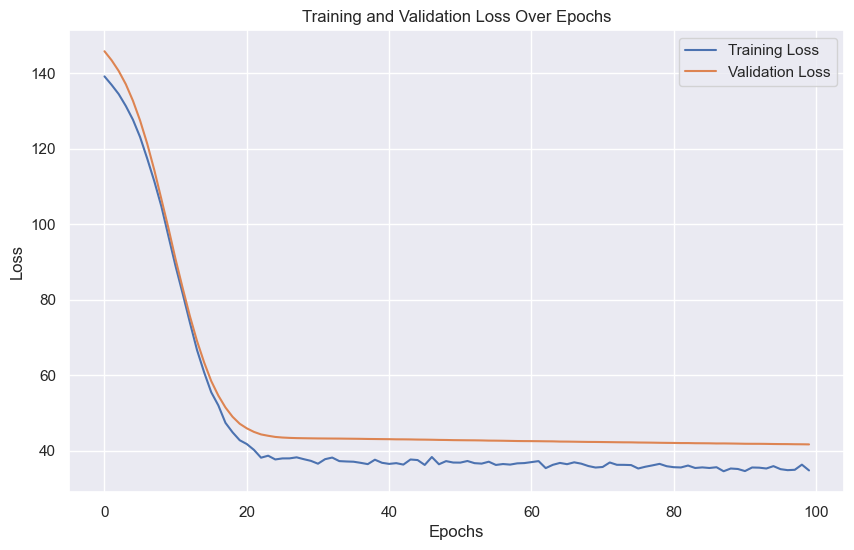

In [1306]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

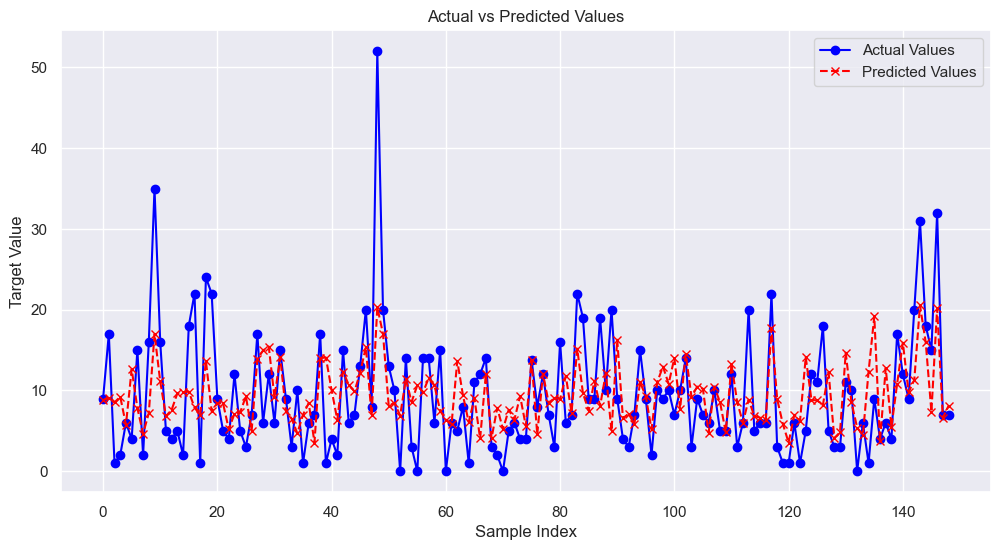

In [1296]:
test_y_array = test_y.to_numpy()
test_y_pred_array = test_y_pred.flatten()
plt.figure(figsize=(12, 6))
plt.plot(test_y_array, label='Actual Values', color='blue', marker='o')
plt.plot(test_y_pred_array, label='Predicted Values', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.show()

### first try of XgBoosting

In [1297]:
target_column = '2022G'
valuable_columns = ['Injury_Sum','ages','minutos', 'position','Currentvalue(M)'] 
armax_data = Dfl[[target_column] + valuable_columns]
armax_data_filled = armax_data.fillna(armax_data.mean())
X = armax_data_filled[valuable_columns]
y = armax_data_filled[target_column]

In [1298]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=40)

In [1299]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

In [1300]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=True)

y_pred = xgb_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R-Squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

[0]	validation_0-rmse:6.93898
[1]	validation_0-rmse:6.85963
[2]	validation_0-rmse:6.84180
[3]	validation_0-rmse:6.79347
[4]	validation_0-rmse:6.72044
[5]	validation_0-rmse:6.68673
[6]	validation_0-rmse:6.71002
[7]	validation_0-rmse:6.72882
[8]	validation_0-rmse:6.74407
[9]	validation_0-rmse:6.79352
[10]	validation_0-rmse:6.81237
[11]	validation_0-rmse:6.83223
[12]	validation_0-rmse:6.92216
[13]	validation_0-rmse:6.91752
[14]	validation_0-rmse:6.93336
[15]	validation_0-rmse:6.94458
R-Squared: 0.32518990790527047
Mean Absolute Error: 4.721689163971801
Root Mean Squared Error: 6.242467392218893


/Users/aa085/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


### Creating models again for resetting and ensembling them, will try to get better results than 0.3 R-square

In [1352]:
Dfl.columns

Index(['Name', 'Injury_Sum', 'ages', 'Assist', 'minutos', 'Currentvalue(M)',
       'Individual Award', 'League_Code', 'position', '2010M', '2010G',
       '2010A', '2010Min', '2011M', '2011G', '2011A', '2011Min', '2012M',
       '2012G', '2012A', '2012Min', '2013M', '2013G', '2013A', '2013Min',
       '2014M', '2014G', '2014A', '2014Min', '2015M', '2015G', '2015A',
       '2015Min', '2016M', '2016G', '2016A', '2016Min', '2017M', '2017G',
       '2017A', '2017Min', '2018M', '2018G', '2018A', '2018Min', '2019M',
       '2019G', '2019A', '2019Min', '2020M', '2020G', '2020A', '2020Min',
       '2021M', '2021G', '2021A', '2021Min', '2022M', '2022G', '2022A',
       '2022Min', '2023M', '2023G', '2023A', '2023Min'],
      dtype='object')

In [1524]:
target_column = '2022G'
random_state = 23

lstm_columns = goal_columns 
armax_data_lstm = Dfl[[target_column] + lstm_columns].fillna(Dfl.mean())
X_lstm = armax_data_lstm.drop([target_column], axis=1)
y_lstm = armax_data_lstm[target_column]

xgboost_columns = ['Individual Award','Injury_Sum', 'ages', 'Assist', 'Currentvalue(M)', 'League_Code', 'position','minutos']
armax_data_xgb = Dfl[[target_column] + xgboost_columns].fillna(Dfl.mean())
X_xgb = armax_data_xgb.drop([target_column], axis=1)
y_xgb = armax_data_xgb[target_column]

X_train_lstm, X_temp_lstm, y_train_lstm, y_temp_lstm = train_test_split(X_lstm, y_lstm, test_size=0.40, random_state=random_state)
X_val_lstm, X_test_lstm, y_val_lstm, y_test_lstm = train_test_split(X_temp_lstm, y_temp_lstm, test_size=0.50, random_state=random_state)

X_train_xgb, X_temp_xgb, y_train_xgb, y_temp_xgb = train_test_split(X_xgb, y_xgb, test_size=0.40, random_state=random_state)
X_val_xgb, X_test_xgb, y_val_xgb, y_test_xgb = train_test_split(X_temp_xgb, y_temp_xgb, test_size=0.50, random_state=random_state)

scaler_lstm = MinMaxScaler(feature_range=(0, 1))
X_train_lstm_scaled = scaler_lstm.fit_transform(X_train_lstm)
X_val_lstm_scaled = scaler_lstm.transform(X_val_lstm)
X_test_lstm_scaled = scaler_lstm.transform(X_test_lstm)

X_train_lstm_scaled = np.reshape(X_train_lstm_scaled, (X_train_lstm_scaled.shape[0], 1, X_train_lstm_scaled.shape[1]))
X_val_lstm_scaled = np.reshape(X_val_lstm_scaled, (X_val_lstm_scaled.shape[0], 1, X_val_lstm_scaled.shape[1]))
X_test_lstm_scaled = np.reshape(X_test_lstm_scaled, (X_test_lstm_scaled.shape[0], 1, X_test_lstm_scaled.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm_scaled.shape[1], X_train_lstm_scaled.shape[2]), return_sequences=True))  # Additional LSTM layer with return_sequences=True
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(50))  
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm_scaled, y_train_lstm, epochs=100, batch_size=32, validation_data=(X_val_lstm_scaled, y_val_lstm), verbose=1)

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)

best_params = {
    'colsample_bytree': 0.7,
    'learning_rate': 0.01,
    'max_depth': 3,
    'n_estimators': 550,
    'subsample': 0.7
}

xgb_model = XGBRegressor(**best_params)

xgb_model.fit(X_train_xgb, y_train_xgb, early_stopping_rounds=10, eval_set=[(X_val_xgb, y_val_xgb)], verbose=True)

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/551304670.py:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  armax_data_lstm = Dfl[[target_column] + lstm_columns].fillna(Dfl.mean())
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/551304670.py:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  armax_data_xgb = Dfl[[target_column] + xgboost_columns].fillna(Dfl.mean())


Epoch 1/100
14/14 [==============================] - 2s 33ms/step - loss: 132.4553 - val_loss: 151.4027
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 130.1649 - val_loss: 147.9491
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 126.0710 - val_loss: 141.3592
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 118.1839 - val_loss: 129.1838
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 104.5964 - val_loss: 109.7540
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 85.6251 - val_loss: 85.9577
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 65.2932 - val_loss: 65.2753
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 50.8447 - val_loss: 52.1097
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 43.2095 - val_loss: 45.8923
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 40.117

14/14 [==============================] - 0s 2ms/step - loss: 35.6887 - val_loss: 37.8876
Epoch 82/100
14/14 [==============================] - 0s 2ms/step - loss: 36.4898 - val_loss: 37.9018
Epoch 83/100
14/14 [==============================] - 0s 2ms/step - loss: 36.3904 - val_loss: 37.9363
Epoch 84/100
14/14 [==============================] - 0s 2ms/step - loss: 36.9988 - val_loss: 37.8170
Epoch 85/100
14/14 [==============================] - 0s 2ms/step - loss: 36.1513 - val_loss: 37.7656
Epoch 86/100
14/14 [==============================] - 0s 2ms/step - loss: 35.6677 - val_loss: 37.7440
Epoch 87/100
14/14 [==============================] - 0s 2ms/step - loss: 36.2063 - val_loss: 37.6219
Epoch 88/100
14/14 [==============================] - 0s 2ms/step - loss: 37.3254 - val_loss: 37.8992
Epoch 89/100
14/14 [==============================] - 0s 2ms/step - loss: 35.1132 - val_loss: 37.6050
Epoch 90/100
14/14 [==============================] - 0s 2ms/step - loss: 36.2292 - val_loss: 3

[197]	validation_0-rmse:5.95721
[198]	validation_0-rmse:5.95570
[199]	validation_0-rmse:5.95472
[200]	validation_0-rmse:5.95523
[201]	validation_0-rmse:5.95485
[202]	validation_0-rmse:5.95204
[203]	validation_0-rmse:5.95131
[204]	validation_0-rmse:5.94961
[205]	validation_0-rmse:5.94862
[206]	validation_0-rmse:5.94670
[207]	validation_0-rmse:5.94635
[208]	validation_0-rmse:5.94669
[209]	validation_0-rmse:5.94420
[210]	validation_0-rmse:5.94103
[211]	validation_0-rmse:5.93778
[212]	validation_0-rmse:5.93604
[213]	validation_0-rmse:5.93533
[214]	validation_0-rmse:5.93429
[215]	validation_0-rmse:5.93330
[216]	validation_0-rmse:5.93146
[217]	validation_0-rmse:5.93060
[218]	validation_0-rmse:5.92981
[219]	validation_0-rmse:5.93147
[220]	validation_0-rmse:5.92991
[221]	validation_0-rmse:5.92609
[222]	validation_0-rmse:5.92601
[223]	validation_0-rmse:5.92549
[224]	validation_0-rmse:5.92365


/Users/aa085/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[225]	validation_0-rmse:5.92148
[226]	validation_0-rmse:5.91830
[227]	validation_0-rmse:5.91535
[228]	validation_0-rmse:5.91398
[229]	validation_0-rmse:5.91164
[230]	validation_0-rmse:5.90987
[231]	validation_0-rmse:5.90847
[232]	validation_0-rmse:5.90841
[233]	validation_0-rmse:5.90847
[234]	validation_0-rmse:5.90682
[235]	validation_0-rmse:5.90617
[236]	validation_0-rmse:5.90497
[237]	validation_0-rmse:5.90377
[238]	validation_0-rmse:5.90267
[239]	validation_0-rmse:5.89895
[240]	validation_0-rmse:5.89847
[241]	validation_0-rmse:5.89889
[242]	validation_0-rmse:5.89920
[243]	validation_0-rmse:5.89731
[244]	validation_0-rmse:5.89837
[245]	validation_0-rmse:5.89479
[246]	validation_0-rmse:5.89540
[247]	validation_0-rmse:5.89603
[248]	validation_0-rmse:5.89430
[249]	validation_0-rmse:5.89462
[250]	validation_0-rmse:5.89120
[251]	validation_0-rmse:5.89130
[252]	validation_0-rmse:5.88876
[253]	validation_0-rmse:5.89003
[254]	validation_0-rmse:5.89034
[255]	validation_0-rmse:5.89024
[256]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=550, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

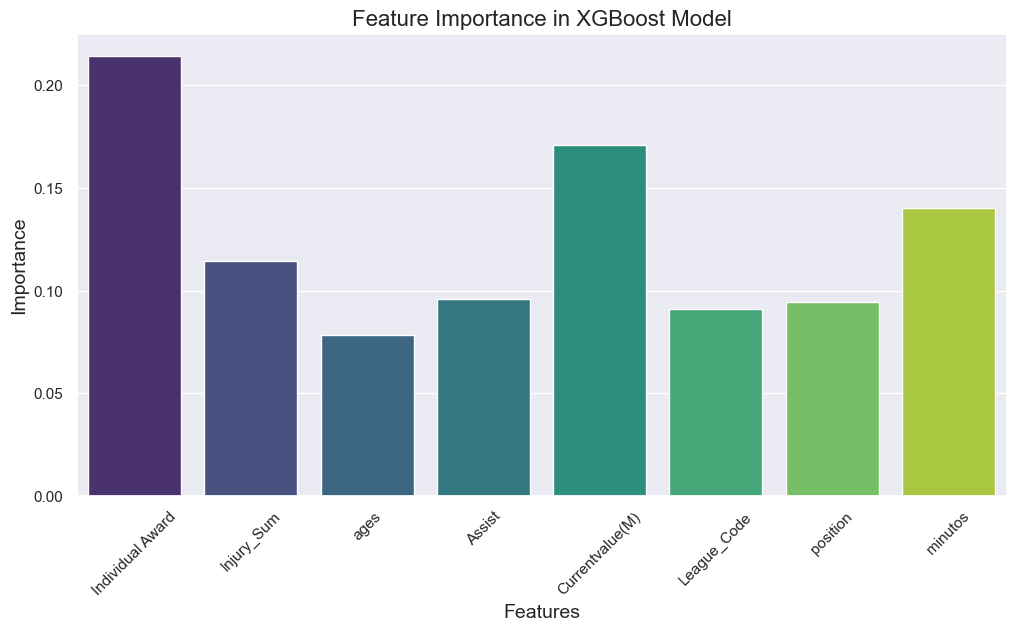

In [1510]:
feature_importances = xgb_model.feature_importances_
features = X_xgb.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=feature_importances, palette='viridis')
plt.title('Feature Importance in XGBoost Model', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Mean approach giving 0.39 R-squared , let's find out if I can increase it by implementing linear regression model to results of XgBoosting and LSTM

In [1559]:
meandata = np.array([a.mean() for a in combined_predictions_test])
r2score = r2_score(y_test_lstm, meandata)
print("R2 Score:", r2score)

R2 Score: 0.39925991121844373


In [1525]:
y_pred_lstm_val = lstm_model.predict(X_val_lstm_scaled).flatten()
y_pred_xgb_val = xgb_model.predict(X_val_xgb)
combined_predictions_val = np.column_stack((y_pred_lstm_val, y_pred_xgb_val))
ensemble_model = LinearRegression()
ensemble_model.fit(combined_predictions_val, y_val_lstm)

5/5 [==============================] - 0s 894us/step


LinearRegression()

In [1522]:
ensemble_predictions_val = ensemble_model.predict(combined_predictions_val)
r2_val = r2_score(y_val_lstm, ensemble_predictions_val)
print(f"R-squared for the ensemble model on validation data: {r2_val}")

R-squared for the ensemble model on validation data: 0.43836883663713744


In [1523]:
mae_val = mean_absolute_error(y_val_lstm, ensemble_predictions_val)
rmse_val = np.sqrt(mean_squared_error(y_val_lstm, ensemble_predictions_val))

print(f"Validation MAE: {mae_val}")
print(f"Validation RMSE: {rmse_val}")

Validation MAE: 3.8459500686542407
Validation RMSE: 5.280714555671964


In [1526]:
y_pred_lstm_test = lstm_model.predict(X_test_lstm_scaled).flatten()
y_pred_xgb_test = xgb_model.predict(X_test_xgb)
combined_predictions_test = np.column_stack((y_pred_lstm_test, y_pred_xgb_test))
ensemble_predictions_test = ensemble_model.predict(combined_predictions_test)
r2_test = r2_score(y_test_lstm, ensemble_predictions_test)  
print(f"R-squared for the ensemble model on test data: {r2_test}")

5/5 [==============================] - 0s 1ms/step
R-squared for the ensemble model on test data: 0.4736389583079379


In [1527]:
mae_test = mean_absolute_error(y_test_lstm, ensemble_predictions_test)  
rmse_test = np.sqrt(mean_squared_error(y_test_lstm, ensemble_predictions_test))
print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")

Test MAE: 4.203517148958757
Test RMSE: 5.6014632857611835


In [1528]:
weights = ensemble_model.coef_
print("Weights (Coefficients) of the Linear Regression Model:")
print(weights)
intercept = ensemble_model.intercept_
print("\nIntercept of the Linear Regression Model:")
print(intercept)

Weights (Coefficients) of the Linear Regression Model:
[0.5560499 0.8103299]

Intercept of the Linear Regression Model:
-3.230793


### XGBoosting Vs LSTM Vs Linear Regression Vs Actuals

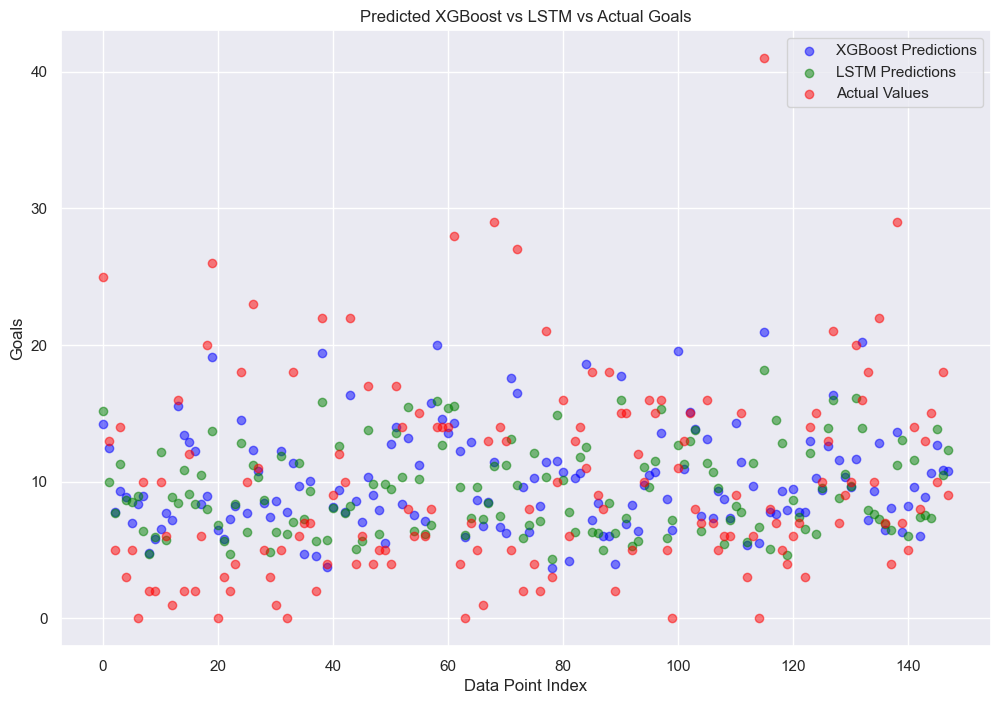

In [1532]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(y_val_lstm)), y_pred_xgb_val, color='blue', label='XGBoost Predictions', alpha=0.5)
plt.scatter(range(len(y_val_lstm)), y_pred_lstm_val, color='green', label='LSTM Predictions', alpha=0.5)
plt.scatter(range(len(y_val_lstm)), y_val_lstm, color='red', label='Actual Values', alpha=0.5)
plt.xlabel('Data Point Index')
plt.ylabel('Goals')
plt.title('Predicted XGBoost vs LSTM vs Actual Goals')
plt.legend()
plt.show()

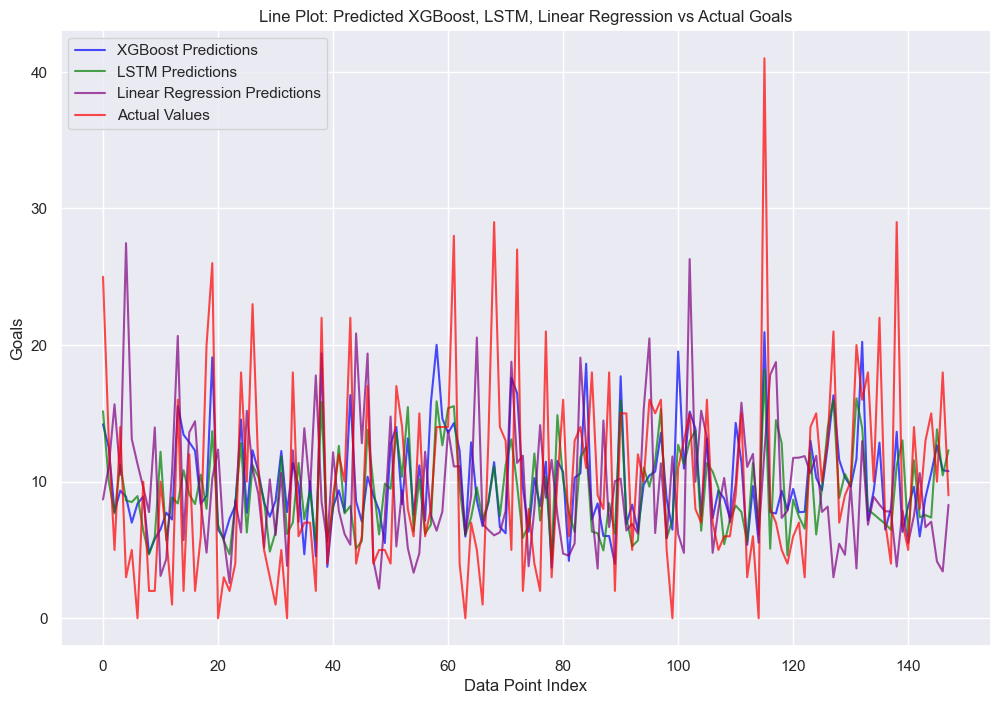

In [1533]:
plt.figure(figsize=(12, 8))
index = range(len(y_val_lstm))
plt.plot(index, y_pred_xgb_val, color='blue', label='XGBoost Predictions', alpha=0.7)
plt.plot(index, y_pred_lstm_val, color='green', label='LSTM Predictions', alpha=0.7)
plt.plot(index, ensemble_predictions_val, color='purple', label='Linear Regression Predictions', alpha=0.7)
plt.plot(index, y_val_lstm, color='red', label='Actual Values', alpha=0.7)
plt.xlabel('Data Point Index')
plt.ylabel('Goals')
plt.title('Line Plot: Predicted XGBoost, LSTM, Linear Regression vs Actual Goals')
plt.legend()
plt.show()

### Dividing plot to parts to analyze better

In [1348]:
def plot_segment(start_index, end_index, y_pred_xgb, y_pred_lstm, y_actual, y_pred_lr):
    plt.figure(figsize=(12, 8))

    # Ensure end_index does not exceed the length of the data
    end_index = min(end_index, len(y_actual))

    index = range(start_index, end_index)

    plt.plot(index, y_pred_xgb[start_index:end_index], color='blue', label='XGBoost Predictions', alpha=0.7)
    plt.plot(index, y_pred_lstm[start_index:end_index], color='green', label='LSTM Predictions', alpha=0.7)
    plt.plot(index, y_pred_lr[start_index:end_index], color='purple', label='Linear Regression Predictions', alpha=0.7)
    plt.plot(index, y_actual[start_index:end_index], color='red', label='Actual Values', alpha=0.7)

    plt.xlabel('Data Point Index')
    plt.ylabel('Goals')
    plt.title(f'Line Plot: Predictions vs Actual Goals (Data Points {start_index} to {end_index})')
    plt.legend()
    plt.show()

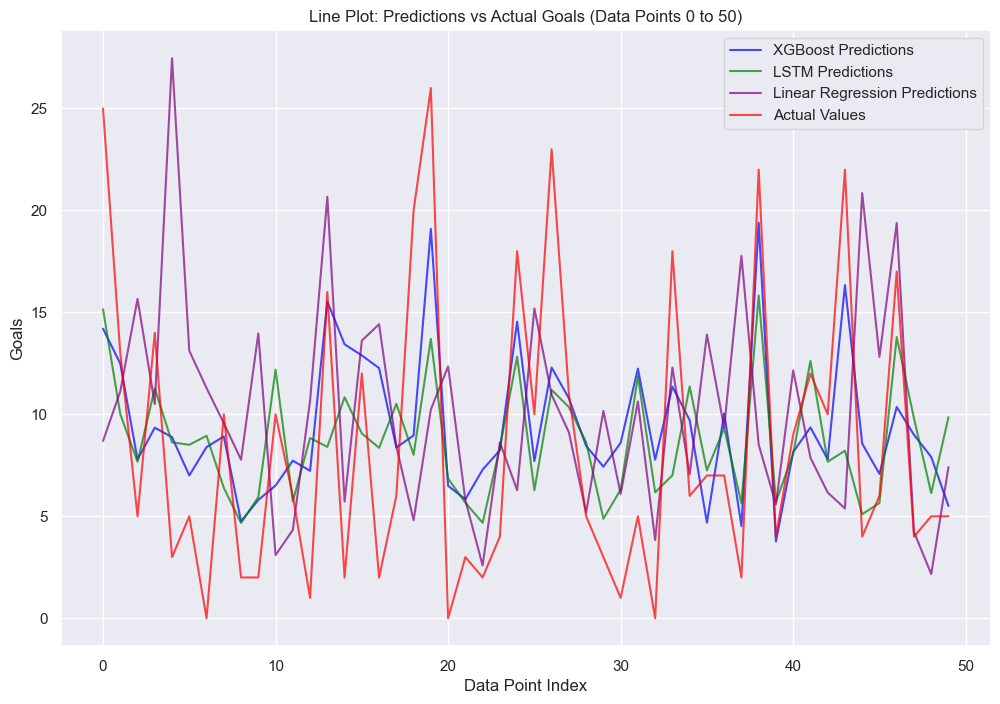

In [1534]:
plot_segment(0, 50, y_pred_xgb_val, y_pred_lstm_val, y_val_lstm, ensemble_predictions_val)

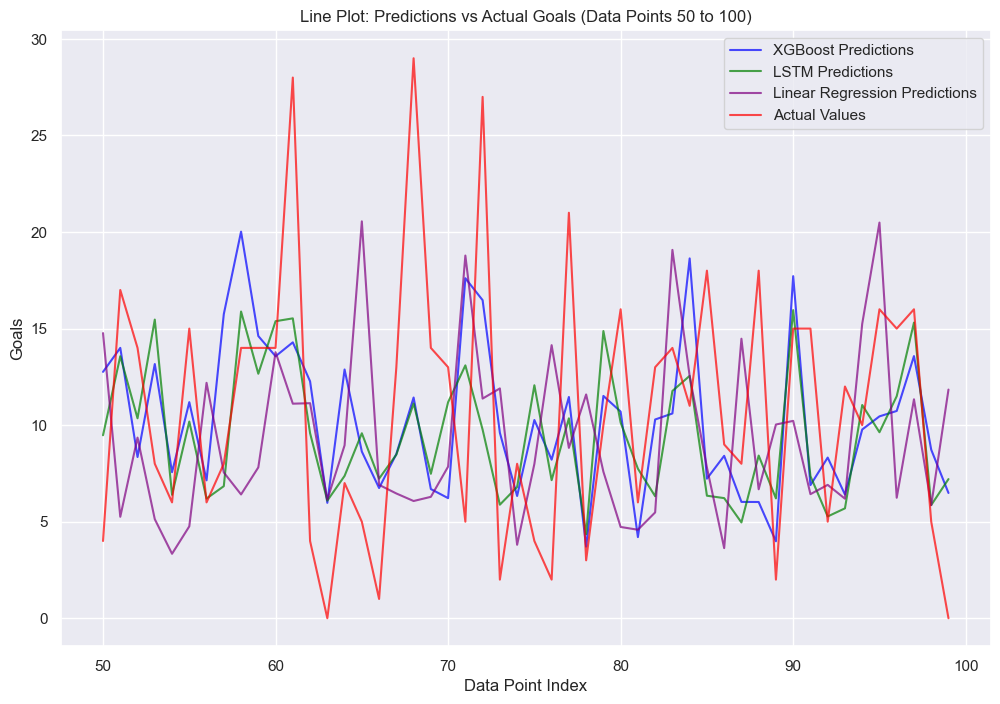

In [1535]:
plot_segment(50, 100, y_pred_xgb_val, y_pred_lstm_val, y_val_lstm, ensemble_predictions_val)

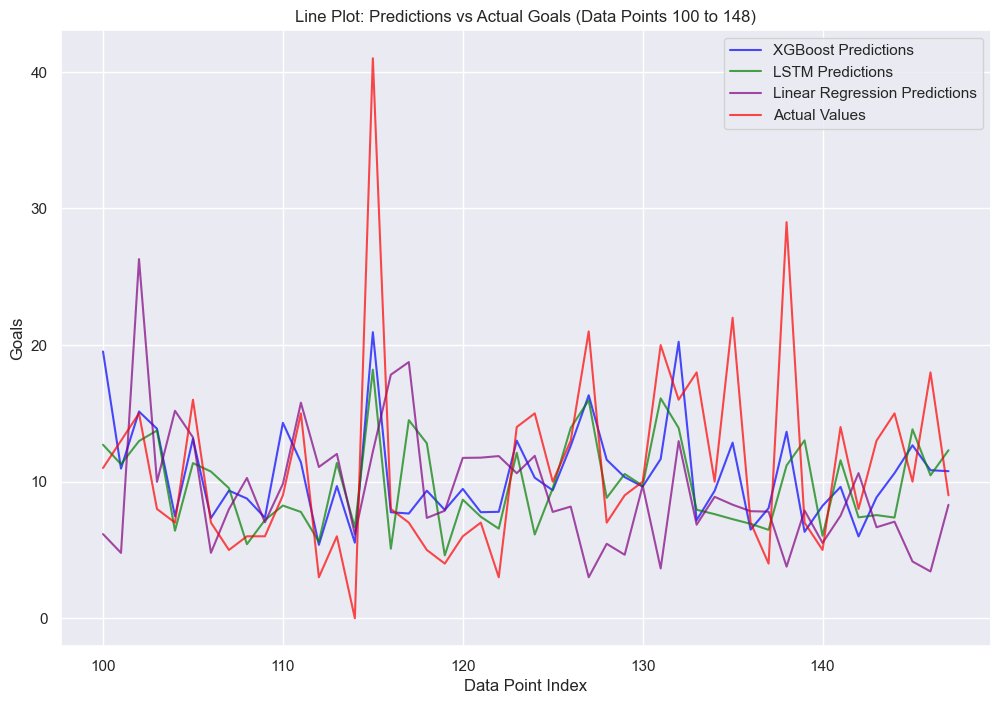

In [1536]:
plot_segment(100, 148, y_pred_xgb_val, y_pred_lstm_val, y_val_lstm, ensemble_predictions_val)

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_65657/2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='2022G', ylabel='Density'>

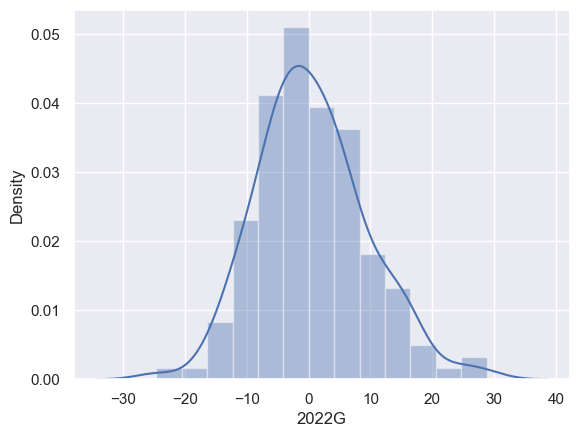

In [1503]:
sns.distplot(residuals) #Normality

### Test MAE and RMSE for SARIMAX with initial data : 7.0, 9.5

### Test MAE and RMSE for SARIMAX with Transposed data : 3.3 , 4.6

### Test MAE and RMSE for Ensembling technique : 4.2 , 5.6 

### Results are highly acceptable when considering target columns ranges from 0 to 60